<a href="https://colab.research.google.com/github/pkohli472/Purnima-/blob/main/Indigo_Hack_to_Hire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importing Dataset**

In [ ]:
import pandas as pd
df = pd.read_json("hf://datasets/toughdata/quora-question-answer-dataset/Quora-QuAD.jsonl", lines=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
df.head(10)

,question,answer
0,Why whenever I get in the shower my girlfriend...,Isn’t it awful? You would swear that there was...
1,"What is a proxy, and how can I use one?",A proxy server is a system or router that prov...
2,"What song has the lyrics ""someone left the cak...",MacArthur's Park\n
3,I am the owner of an adult website called http...,Don't let apps that are liers put adds on your...
4,Does the Bible mention anything about a place ...,St. John in the book of Revelation mentions an...
5,What are useful free and open-source tools for...,"Can't live without screen, vim, git, puppet, f..."
6,The justice department has told the state of M...,🤣🤣🤣 its not much different than states legaliz...
7,Why are the Kardashians so popular? Why are pe...,Answer is simple - They are rich and beautiful...
8,How fast could the US Air Force SR-71 Blackbir...,These questions are always tilted by purpose a...
9,Did a landlord ever offer to lower your rent s...,it’s never happened that a landlord has offere...


# **2. Analyzing Dataset**

In [ ]:
print(df.info())
print(df.describe())
print(df.shape)
print(df.isnull().sum())
print(df.dtypes)
print(df.nunique())
print(df['question'].value_counts())
print(df['answer'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56402 entries, 0 to 56401
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  56402 non-null  object
 1   answer    56402 non-null  object
dtypes: object(2)
memory usage: 881.4+ KB
None
                                                 question answer
count                                               56402  56402
unique                                               3234  54726
top     Would Hillary Clinton have made a better Presi...   No\n
freq                                                  106     89
(56402, 2)
question    0
answer      0
dtype: int64
question    object
answer      object
dtype: object
question     3234
answer      54726
dtype: int64
question
Would Hillary Clinton have made a better President than Donald J Trump?                                                                                                                                       

# **3. Data Cleaning**

In [ ]:
# Installing library to Expand Contractions
!pip install contractions

# Installing library to Expand Abbreviations
!pip install abbrev

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.3 MB/s eta 0:00:00


In [ ]:
import contractions

def expand_contractions(data):
    return contractions.fix(data)

df['answer']=df['answer'].apply(lambda z: expand_contractions(z))
df['question']=df['question'].apply(lambda z: expand_contractions(z))

In [ ]:
def expand_abbreviations(text):
    choices = ['As Soon As Possible', 'For Your Information', 'By The Way', 'In My Opinion', 'I Don\'t Know', 'If I Remember Correctly', 'To Be Honest', 'Too Long; Didn\'t Read', 'For What It\'s Worth', 'Good Game', 'No Problem', 'Please', 'Thanks', 'See You', 'I See', 'Just Kidding', 'Laugh Out Loud', 'Oh My God', 'Rolling On the Floor Laughing', 'Shaking My Head', 'You Only Live Once']
    abbreviations = ['ASAP', 'FYI', 'BTW', 'IMO', 'IDK', 'IIRC', 'TBH', 'TL;DR', 'FWIW', 'GG', 'NP', 'PLZ', 'THX', 'CU', 'IC', 'JK', 'LOL', 'OMG', 'ROFL', 'SMH', 'YOLO']
    abbreviations_dict = {abbreviation.lower(): choice for abbreviation, choice in zip(abbreviations, choices)}

    words = text.split()
    expanded_words = []
    for word in words:
        word = word.strip('.,;:!?"\'')

        if word.upper() in abbreviations:
            expanded_words.append(abbreviations_dict[word.lower()])
        else:
            expanded_words.append(word)
    return ' '.join(expanded_words)

df['answer']=df['answer'].apply(lambda z: expand_abbreviations(z))
df['question']=df['question'].apply(lambda z: expand_abbreviations(z))

In [ ]:
import re
#Removes Punctuations
def punctuations(data):
    tag=re.compile(r'[^\w\s]')
    data=tag.sub(r'',data)
    return data

#Removes HTML syntaxes
def html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data

#Removes URL data
def url(data):
    url_pattern = re.compile(r"(https?:\/\/(?:[-\w]+\.)+[a-zA-Z]{2,}(?:\/[^\s]*)?)|(www\.(?:[-\w]+\.)+[a-zA-Z]{2,}(?:\/[^\s]*)?)")
    data = url_pattern.sub(r'', data)
    return re.sub(r'\s+', ' ', data).strip()

#Removes Emojis
def emoji(data):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data=emoji_clean.sub(r'',data)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

In [ ]:
df['question']=df['question'].apply(lambda z: punctuations(z))
df['question']=df['question'].apply(lambda z: html(z))
df['question']=df['question'].apply(lambda z: url(z))
df['question']=df['question'].apply(lambda z: emoji(z))

df['answer']=df['answer'].apply(lambda z: punctuations(z))
df['answer']=df['answer'].apply(lambda z: html(z))
df['answer']=df['answer'].apply(lambda z: url(z))
df['answer']=df['answer'].apply(lambda z: emoji(z))

# **4. Data Preparation**

In [ ]:
def lower_case(sentence):
    return sentence.lower()

In [ ]:
df['question']=df['question'].apply(lambda z: lower_case(z))
df['answer']=df['answer'].apply(lambda z: lower_case(z))

In [ ]:
df.head(20)

,question,answer
0,why whenever i get in the shower my girlfriend...,is not it awful you would swear that there was...
1,what is a proxy and how can i use one,a proxy server is a system or router that prov...
2,what song has the lyrics someone left the cake...,macarthurs park
3,i am the owner of an adult website called http...,do not let apps that are liers put adds on you...
4,does the bible mention anything about a place ...,st john in the book of revelation mentions an ...
5,what are useful free and opensource tools for ...,cannot live without screen vim git puppet fabr...
6,the justice department has told the state of m...,its not much different than states legalizing ...
7,why are the kardashians so popular why are peo...,answer is simple they are rich and beautiful t...
8,how fast could the us air force sr71 blackbird...,these questions are always tilted by purpose a...
9,did a landlord ever offer to lower your rent s...,it is never happened that a landlord has offer...


# **5. Data Vizualizations**

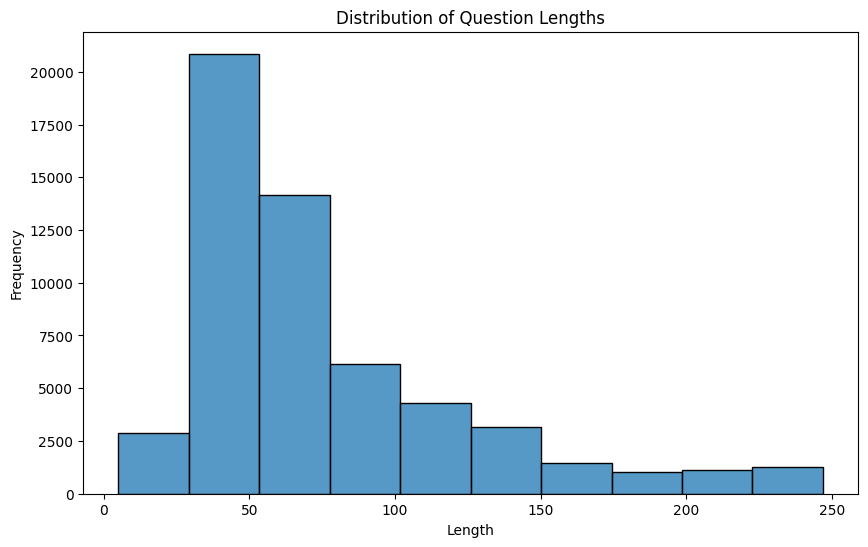

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the length of each question and answer
df['question_length'] = df['question'].apply(len)
df['answer_length'] = df['answer'].apply(len)

# Plot a histogram of question lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['question_length'], bins=10)
plt.title('Distribution of Question Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

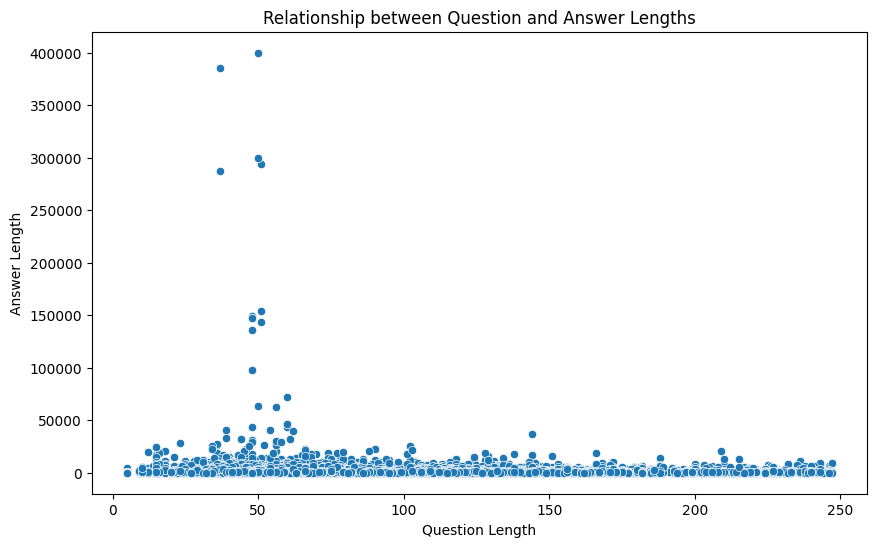

In [ ]:
# Plot a scatter plot of question length vs answer length
plt.figure(figsize=(10, 6))
sns.scatterplot(x='question_length', y='answer_length', data=df)
plt.title('Relationship between Question and Answer Lengths')
plt.xlabel('Question Length')
plt.ylabel('Answer Length')
plt.show()

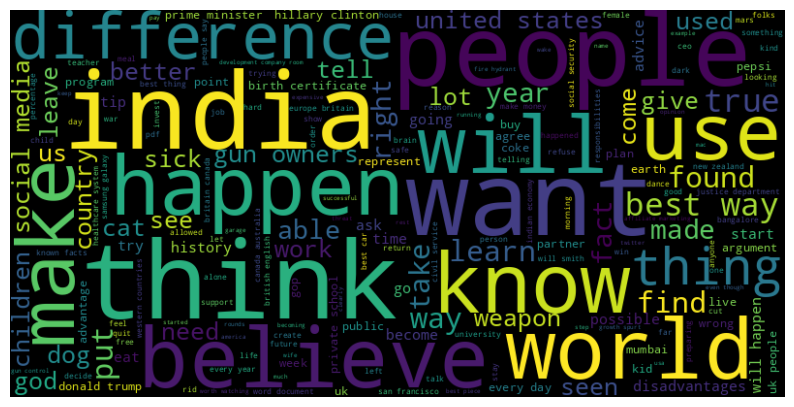

In [ ]:
from wordcloud import WordCloud

# Create a word cloud of the questions
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(" ".join(df['question']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

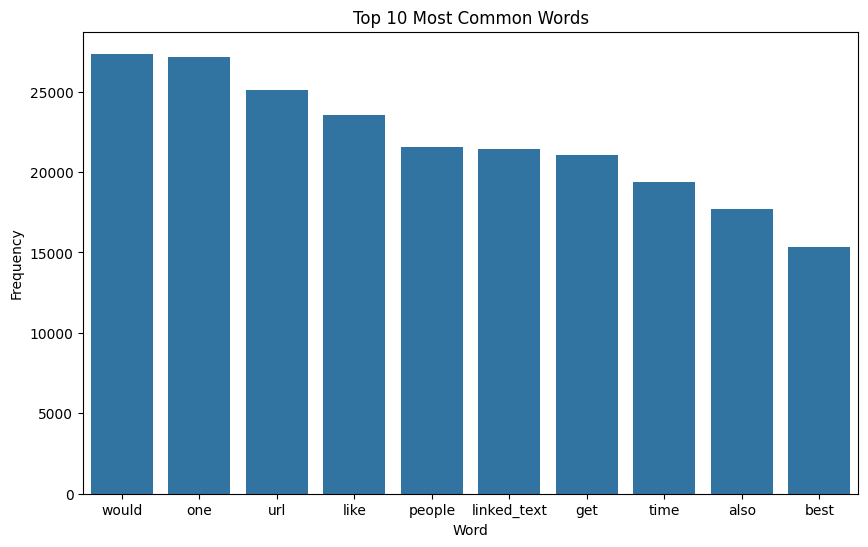

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize

# Combine the questions and answers into a single string
text = " ".join(df['question']) + " " + " ".join(df['answer'])

# Tokenize the text
tokens = word_tokenize(text)

# Remove stopwords
stopwords = set(nltk.corpus.stopwords.words('english'))
tokens = [token for token in tokens if token.lower() not in stopwords]

# Count the frequency of each word
word_freq = Counter(tokens)

# Get the top 10 most common words
top_words = word_freq.most_common(10)

# Plot a bar chart of the top 10 most common words
plt.figure(figsize=(10, 6))
sns.barplot(x=[word for word, freq in top_words], y=[freq for word, freq in top_words])
plt.title('Top 10 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

# **6. Saving Processed Dataset to Excel**

In [ ]:
# Create a DataFrame
pk = pd.DataFrame(df)

# Save the DataFrame to an Excel file
pk.to_excel('Quora_DataSet1.xlsx', index=False)

# This should give the final cleaned dataset

# **7. Implementing T5 NLP Model**

In [ ]:
import pandas as pd
x='Quora.xlsx'
x=pd.read_excel(x)
x.head()

,question,answer
0,what are some little known benefits to leasing...,according to me yes because it allows me to re...
1,what are the differences between those who suc...,the difference between those who succeed slowl...
2,got spoilers s8e6 why was lord of vale robin a...,robin arryn was present he is the young guy si...
3,what is a proxy and how can i use one,think if you are using the internet directly a...
4,how do i get someone is name by their mobile n...,there are several ways to trace someone is nam...


In [ ]:
!pip install torch
import torch
from transformers import T5ForConditionalGeneration, T5Tokenizer
import pandas as pd

# Load pre-trained T5 model and tokenizer
model = T5ForConditionalGeneration.from_pretrained('t5-small')
tokenizer = T5Tokenizer.from_pretrained('t5-small')

def answer_question(question, context):
    input_text = f"answer: {question} context: {context}"
    input_ids = tokenizer.encode(input_text, return_tensors='pt', max_length=512, truncation=True)
    res = model.generate(input_ids)
    answer = tokenizer.decode(res[0], skip_special_tokens=True)
    return answer

# Assume x is a pandas dataframe with columns 'question' and 'answer'
output_data = []
for i, row in x.iterrows():
    question = row['question']
    context = row['answer']
    answer = answer_question(question, context)
    output_data.append({
        'Question': question,
        'Context': context,
        'Generated Answer': answer
    })

output_df = pd.DataFrame(output_data)
print(output_df)

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


                                              Question  \
0    what are some little known benefits to leasing...   
1    what are the differences between those who suc...   
2    got spoilers s8e6 why was lord of vale robin a...   
3                what is a proxy and how can i use one   
4    how do i get someone is name by their mobile n...   
..                                                 ...   
245             have you left california and if so why   
246  why is lord nelson considered as one of the mo...   
247  is there an affordable webbased small business...   
248  what is the most foul smelling thing you found...   
249  what are useful free and opensource tools for ...   

                                               Context  \
0    according to me yes because it allows me to re...   
1    the difference between those who succeed slowl...   
2    robin arryn was present he is the young guy si...   
3    think if you are using the internet directly a...   
4    there ar

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

bleu_scores = []
for i in range(len(output_df)):
    question = output_df.loc[i, 'Context'].split()
    context = output_df.loc[i, 'Generated Answer'].split()
    answerb = sentence_bleu([question], context)
    bleu_scores.append(answerb)
    print(answerb)

output_df['BLEU Score'] = bleu_scores

0.00852539534290986
2.6048365002464873e-05
0
3.9292944903840706e-16
3.217007998044483e-06
3.364187208640938e-157
0.010170791000516457
4.927694443425115e-10
5.963471259940621e-05
1.0232084205957152e-20
0.36787944117144233
0.12655655487032683
0.0301973834223185
2.0437745973900062e-08
5.06908785873347e-163
0.00017956020542583297
2.417663392176548e-07
0
0
0.004690921803697652
2.0444361166087533e-240
1.2673871971100615e-130
6.842911947932455e-86
4.190437470652203e-07
8.282545168379716e-11
0.046942889675325485
4.563047473534918e-161
5.3165266341544634e-05
0
6.113034184863022e-05
0.16529888822158656
3.954302160185631e-233
0
7.900606607273512e-13
0.00010017739869271026
2.6277692422574996e-08
2.5786552588947663e-171
0.11114490060599615
0.00010971252097950153
4.2238732580116884e-160
5.982962536741682e-12
0.0
5.867755323846935e-91
2.4003617627483247e-09
5.3890750939849635e-241
3.389494326196924e-08
4.706717879762745e-13
1.3958468107143248e-167
6.842911947932455e-86
0.0990134083638263
0.0001167406

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

2.2155286057208616e-268
0
2.677035016894217e-84
1.0112214926104486e-43
0.0820849986238988
7.020566349128716e-06
0
0.007172507245008699
0
0.0002878522430918366
0.3490180709313199
0.511506734994179
0.621392059226978
3.303723669680962e-88
5.5152895437682574e-06
0.49367278838913037
0
0.00784682430264206
6.648325074708459e-08
0
0.530242665327517
0.009403562551495206
0.010051835744633586
3.927863545481039e-07
8.255043244922321e-165
0
0.016389553790213604
0.0015623901832581275
3.6844357806667474e-233
0.09868824146980928
2.7763763450907593e-236
1.013009359863071e-05
1.3969166544515696e-283
0.1353352832366127
0
9.797783966128938e-05
5.716660017921741e-10
4.030389204643943e-232
4.2516103971253996e-134
1.1967291556046007e-05
2.5699385151464813e-75
3.398267819495071e-09
7.738488047187003e-82
1.634407582361681e-277
0.14406365910145327
4.623705725046528e-10
0.061685012567976046
0.0005004514334406108
0.0032985057559390915
2.3776746679463666e-09
3.224829009487311e-156
0
4.172168910160028e-11
0.0047259

In [ ]:
output_df['BLEU Score'] = output_df.apply(lambda row: sentence_bleu([row['Context'].split()], row['Generated Answer'].split()), axis=1)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

In [ ]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=eba95597ba4828c764e3529c1c05ce869c90e7b060b56519bab8916b24bf0bbb
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
rogue_scoresT5 = []

def calculate_rouge(question, context):
    # implement your ROUGE score calculation logic here

    from rouge_score import rouge_scorer
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    scores = scorer.score(question, context)
    return scores

for i in range(len(output_df)):
    question = output_df.loc[i, 'Context']
    context = output_df.loc[i, 'Generated Answer']
    if isinstance(context, float):
        context = str(context)
    if isinstance(question, float):
        question = str(question)
    answerr = calculate_rouge(question, context)
    rogue_scoresT5.append(answerr)
    print(answerr)

output_df['T5 Rogue Score'] = rogue_scoresT5

{'rouge1': Score(precision=1.0, recall=0.1717171717171717, fmeasure=0.29310344827586204), 'rougeL': Score(precision=1.0, recall=0.1717171717171717, fmeasure=0.29310344827586204)}
{'rouge1': Score(precision=1.0, recall=0.08653846153846154, fmeasure=0.1592920353982301), 'rougeL': Score(precision=1.0, recall=0.08653846153846154, fmeasure=0.1592920353982301)}
{'rouge1': Score(precision=0.0, recall=0.0, fmeasure=0.0), 'rougeL': Score(precision=0.0, recall=0.0, fmeasure=0.0)}
{'rouge1': Score(precision=1.0, recall=0.0273972602739726, fmeasure=0.05333333333333332), 'rougeL': Score(precision=1.0, recall=0.0273972602739726, fmeasure=0.05333333333333332)}
{'rouge1': Score(precision=1.0, recall=0.07327586206896551, fmeasure=0.1365461847389558), 'rougeL': Score(precision=1.0, recall=0.07327586206896551, fmeasure=0.1365461847389558)}
{'rouge1': Score(precision=0.7333333333333333, recall=0.11578947368421053, fmeasure=0.2), 'rougeL': Score(precision=0.4666666666666667, recall=0.07368421052631578, fme

In [ ]:
output_df

,Question,Context,Generated Answer,BLEU Score,T5 Rogue Score
0,what are some little known benefits to leasing...,according to me yes because it allows me to re...,i do not think so i will ride the varieties of...,8.525395e-03,"{'rouge1': (1.0, 0.1717171717171717, 0.2931034..."
1,what are the differences between those who suc...,the difference between those who succeed slowl...,the difference between those who succeed slowl...,2.604837e-05,"{'rouge1': (1.0, 0.08653846153846154, 0.159292..."
2,got spoilers s8e6 why was lord of vale robin a...,robin arryn was present he is the young guy si...,got spoilers s8e6,0.000000e+00,"{'rouge1': (0.0, 0.0, 0.0), 'rougeL': (0.0, 0...."
3,what is a proxy and how can i use one,think if you are using the internet directly a...,proxy server does not provide any security or ...,3.929294e-16,"{'rouge1': (1.0, 0.0273972602739726, 0.0533333..."
4,how do i get someone is name by their mobile n...,there are several ways to trace someone is nam...,tracing someone is name through their mobile n...,3.217008e-06,"{'rouge1': (1.0, 0.07327586206896551, 0.136546..."
...,...,...,...,...,...
245,have you left california and if so why,i grew up in southern california so paying hig...,would i pay their ridiculous rent to be surrou...,4.563526e-07,"{'rouge1': (1.0, 0.0641025641025641, 0.1204819..."
246,why is lord nelson considered as one of the mo...,simply he won a string a battles against the f...,lord nelson,0.000000e+00,"{'rouge1': (0.0, 0.0, 0.0), 'rougeL': (0.0, 0...."
247,is there an affordable webbased small business...,today there are many affordable webbased small...,there are many affordable webbased small busin...,1.877568e-03,"{'rouge1': (1.0, 0.13636363636363635, 0.240000..."
248,what is the most foul smelling thing you found...,i was sitting on the sofa of my old farm house...,the most foul smelling thing you found when cl...,1.392090e-235,"{'rouge1': (0.29411764705882354, 0.02906976744..."


# **8. Implementing Bidirectional Encoder**

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForQuestionAnswering

# Load the BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForQuestionAnswering.from_pretrained('bert-base-uncased')

# Define a function to answer questions
def answer_question(question, context):
    inputs = tokenizer.encode_plus(
        question,
        context,
        add_special_tokens=True,
        max_length=512,
        return_attention_mask=True,
        return_tensors='pt',
        truncation=True
    )
    outputs = model(inputs['input_ids'], attention_mask=inputs['attention_mask'])
    answer_start = torch.argmax(outputs.start_logits)
    answer_end = torch.argmax(outputs.end_logits) + 1
    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(inputs['input_ids'][0][answer_start:answer_end]))
    return answer

# Create a new DataFrame to store the answers
answers_df = pd.DataFrame(columns=['question', 'answer'])

# Test the function and store the answers in the DataFrame
for i in range(len(x)):
    question = x.loc[i, 'question']
    context = x.loc[i, 'answer']
    answer = answer_question(question, context)
    answers_df.loc[i] = [question, answer]

# Print the answers DataFrame
print(answers_df)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are n

                                              question  \
0    what are some little known benefits to leasing...   
1    what are the differences between those who suc...   
2    got spoilers s8e6 why was lord of vale robin a...   
3                what is a proxy and how can i use one   
4    how do i get someone is name by their mobile n...   
..                                                 ...   
245             have you left california and if so why   
246  why is lord nelson considered as one of the mo...   
247  is there an affordable webbased small business...   
248  what is the most foul smelling thing you found...   
249  what are useful free and opensource tools for ...   

                                                answer  
0                                                       
1                                                       
2    westeros lords where bran was chosen as the ki...  
3                                                       
4                 

In [ ]:
bleu_scores = []
for i in range(len(answers_df)):
    question = answers_df.loc[i, 'question'].split()
    context = answers_df.loc[i, 'answer'].split()
    answerb = sentence_bleu([question], context)
    bleu_scores.append(answerb)
    print(answerb)

answers_df['BLEU Score'] = bleu_scores

0
0
0.24037658577843848
0
0
0.23919813519859084
1.0075180458004646e-78
7.517155770510923e-232
0
0
0.2765355515845788
9.109159947227211e-232
3.4918948486375036e-155
7.839468582704747e-232
1.2244357773142914e-155
0
0
1.0669733992029681e-231
2.59212442348853e-78
0
0
1.0003688322288243e-231
4.38810481436839e-155
2.1126899331310483e-155
0
4.987693055201041e-155
4.515870009358044e-234
0.03043199920502415
0
0
0.12607162121844206
0.8070557274927982
0.25283959580474646
9.48688413430962e-232
0
0
0.1359474317074539
0
7.437597952034396e-232
0
0
0
0
1.7694951278199511e-155
0
0
0
0
0.21409092659758044
0
9.452322961974386e-232
0
0
0
0
0
0
5.312811551061439e-155
3.2259735207302735e-232
0.06902498108894259
0
0
0
7.784451369270533e-232
0.8668778997501817
0.513417119032592
0
1.0334688538867534e-78
0.1352102459252932
0
9.363140134330432e-232
0
0
0.28795572389417323
2.9753772713440074e-155
0
0
1.909707900350573e-155
0
0.2191238425080702
6.434960396189362e-79
0
0
0
8.088200202498789e-233
1.0518351895246305e

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

In [ ]:
rogue_scoresT5 = []

def calculate_rouge(question, context):
    # implement your ROUGE score calculation logic here

    from rouge_score import rouge_scorer
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    scores = scorer.score(question, context)
    return scores

for i in range(len(answers_df)):
    question = answers_df.loc[i, 'question']
    context = answers_df.loc[i, 'answer']
    if isinstance(context, float):
        context = str(context)
    if isinstance(question, float):
        question = str(question)
    answerr = calculate_rouge(question, context)
    rogue_scoresT5.append(answerr)
    print(answerr)

answers_df['T5 Rogue Score'] = rogue_scoresT5

{'rouge1': Score(precision=0.0, recall=0.0, fmeasure=0.0), 'rougeL': Score(precision=0, recall=0, fmeasure=0)}
{'rouge1': Score(precision=0.0, recall=0.0, fmeasure=0.0), 'rougeL': Score(precision=0, recall=0, fmeasure=0)}
{'rouge1': Score(precision=0.3783783783783784, recall=0.5833333333333334, fmeasure=0.45901639344262296), 'rougeL': Score(precision=0.24324324324324326, recall=0.375, fmeasure=0.2950819672131148)}
{'rouge1': Score(precision=0.0, recall=0.0, fmeasure=0.0), 'rougeL': Score(precision=0, recall=0, fmeasure=0)}
{'rouge1': Score(precision=0.0, recall=0.0, fmeasure=0.0), 'rougeL': Score(precision=0, recall=0, fmeasure=0)}
{'rouge1': Score(precision=0.3125, recall=0.9210526315789473, fmeasure=0.4666666666666666), 'rougeL': Score(precision=0.23214285714285715, recall=0.6842105263157895, fmeasure=0.3466666666666667)}
{'rouge1': Score(precision=0.08196721311475409, recall=0.5555555555555556, fmeasure=0.14285714285714285), 'rougeL': Score(precision=0.06557377049180328, recall=0.44

In [ ]:
answers_df

,question,answer,BLEU Score,T5 Rogue Score
0,what are some little known benefits to leasing...,,0.000000,"{'rouge1': (0.0, 0.0, 0.0), 'rougeL': (0, 0, 0)}"
1,what are the differences between those who suc...,,0.000000,"{'rouge1': (0.0, 0.0, 0.0), 'rougeL': (0, 0, 0)}"
2,got spoilers s8e6 why was lord of vale robin a...,westeros lords where bran was chosen as the ki...,0.240377,"{'rouge1': (0.3783783783783784, 0.583333333333..."
3,what is a proxy and how can i use one,,0.000000,"{'rouge1': (0.0, 0.0, 0.0), 'rougeL': (0, 0, 0)}"
4,how do i get someone is name by their mobile n...,,0.000000,"{'rouge1': (0.0, 0.0, 0.0), 'rougeL': (0, 0, 0)}"
...,...,...,...,...
245,have you left california and if so why,,0.000000,"{'rouge1': (0.0, 0.0, 0.0), 'rougeL': (0, 0, 0)}"
246,why is lord nelson considered as one of the mo...,,0.000000,"{'rouge1': (0.0, 0.0, 0.0), 'rougeL': (0, 0, 0)}"
247,is there an affordable webbased small business...,also use freshbooks xero wave invoice2go invoice,0.000000,"{'rouge1': (0.0, 0.0, 0.0), 'rougeL': (0.0, 0...."
248,what is the most foul smelling thing you found...,and discovered my excellent mouser feline had ...,0.000000,"{'rouge1': (0.0, 0.0, 0.0), 'rougeL': (0.0, 0...."


# **9. Implementing GPT2**

In [ ]:
import pandas as pd
x='Quora2.xlsx'
x=pd.read_excel(x)
x.head()

,question,answer
0,what are some little known benefits to leasing...,according to me yes because it allows me to re...
1,what are the differences between those who suc...,the difference between those who succeed slowl...
2,got spoilers s8e6 why was lord of vale robin a...,robin arryn was present he is the young guy si...
3,what is a proxy and how can i use one,think if you are using the internet directly a...
4,how do i get someone is name by their mobile n...,there are several ways to trace someone is nam...


In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import pandas as pd

# Load pre-trained GPT-2 model and tokenizer
model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

def answer_question(question, context):
    input_text = f"{question} {context}"
    input_ids = tokenizer.encode(input_text, return_tensors='pt', max_length=1024, truncation=True)

    # Generate position IDs to match the input length
    position_ids = torch.arange(input_ids.shape[1]).unsqueeze(0)

    output = model.generate(input_ids,
                           max_new_tokens=50,
                           early_stopping=True,
                           position_ids=position_ids)  # Pass position IDs to the model
    answer = tokenizer.decode(output[0], skip_special_tokens=True)
    return answer

# Assume x is a pandas dataframe with columns 'question' and 'context'
ans_df = pd.DataFrame(columns=['question', 'context', 'answer'])

# Assume x is a pandas dataframe with columns 'question' and 'context'
for i in range(len(x)):
    question = x.loc[i, 'question']
    context = x.loc[i, 'answer']  # Assuming 'answer' column contains the context
    if context:  # Check if context is not empty or None
        answer = answer_question(question, context)
        print(f"Question: {question}")
        print(f"Answer: {answer}")
        print()
        ans_df.loc[i] = [question, context, answer]
    else:
        print(f"Question: {question}")
        print("No context available")
        print()
        ans_df.loc[i] = [question, context, "No context available"]

print(ans_df)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attent

Question: what are some little known benefits to leasing a vehicle rather than purchasing
Answer: what are some little known benefits to leasing a vehicle rather than purchasing according to me yes because it allows me to rent the varieties of the car as i want i can select any beautiful car according to my work or events if i will go with owning a car then i do not think so i will ride the varieties of luxury cars or will it be easier to afford a dealing with the car dealer maintenance workshops taxation insurance company etc if i am having multiple cars does not seems so i will go with car leasing companies as i usually rent from linked_text smasindia url httpwwwsmasindiacom thanks for the info i will go with car leasing companies as i usually rent from linked_text smasindia url http://wwwsmasindiacom thanks for the info i will go with car leasing companies as i usually rent from linked_text



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what are the differences between those who succeed slowly and those who succeed fast
Answer: what are the differences between those who succeed slowly and those who succeed fast the difference between those who succeed slowly and those who succeed fast can be attributed to several factors including risk tolerance those who are willing to take bigger risks are more likely to experience fast success while those who take smaller calculated risks may experience slower but steadier successtiming sometimes success is simply a matter of being in the right place at the right time those who are able to identify and capitalize on opportunities quickly may experience faster successpersistence success often requires persistence and the ability to overcome obstacles those who are able to persevere through setbacks and failures may experience slower but steady successnetwork building a strong network of contacts and supporters can help accelerate success those who are able to build strong 

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: got spoilers s8e6 why was lord of vale robin arryn missing from the meeting of westeros lords where bran was chosen as the king
Answer: got spoilers s8e6 why was lord of vale robin arryn missing from the meeting of westeros lords where bran was chosen as the king robin arryn was present he is the young guy sitting beside lord yohn royce he also supported his cousin bran and gave his vote in brans favor the thing is we have not seen him in so much time that it is shocking to see him grown up all of a sudden on the show he is a very good guy and he is a good guy and he is a good guy and he is a good guy and he is a good guy and he is a good guy and he is a good guy and he is a good guy and he



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what is a proxy and how can i use one
Answer: what is a proxy and how can i use one think if you are using the internet directly and the website you are accessing is continuously pulling your personal information like your ip address location hostname type and version of your operating system browser history and cache etc on the basis of these pieces of information the website will provide you with the requested data the linked_text proxy server url httpsroutebigcomwhatisproxyserver stands between you and the online web resource that you are accessing it acts as a gateway between the content requested by you and the content delivered by the online resource it can filter or hide the content you are requesting to the online resources to prevent online resource to access your personal information and make you hide or anonymous how the proxy server works when you are trying to access the online web resource using your web browser the request goes to the proxy server firstly the p

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: how do i get someone is name by their mobile number
Answer: how do i get someone is name by their mobile number there are several ways to trace someone is name through a mobile number use a reverse phone lookup service you can use a reverse phone lookup service like whitepages or truecaller to trace the name associated with a mobile number these services use public records and other sources to provide information about the owner of a phone numberuse social media if you have the phone number of the person you are trying to trace you can try searching for them on social medial platforms like facebook linkedin or twitter if the person has connected their phone number to their social media account you may be able to find their namecontact the service provider if the phone number belongs to a mobile phone service provider you can contact them and request information about the owner of the number however the service provider may require a legal reason for providing this information

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: are the iron dome and davids sling systems the most powerful air defense systems in the world especially since iran hamas hezbollah have been unable for several years to manufacture planes and missiles that exceed these two systems
Answer: are the iron dome and davids sling systems the most powerful air defense systems in the world especially since iran hamas hezbollah have been unable for several years to manufacture planes and missiles that exceed these two systems no they are not hamas is a small organization in a small impoverished strip of land iron dome was created to counter their mostly homemade rockets david sling and arrow is meant for hezbollah and iran iran makes the weapons that goes to hezbollah or at least the advanced ones iran has weapons that can penetrate these systems although they prefer to fend off israel indirectly these systems can be overwhelmed by sheer quantity as well hamas is too small and poorly funded to overwhelm the iron dome hezbollah on othe

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: does any species exist which cannot thrive in captivity
Answer: does any species exist which cannot thrive in captivity certainly there are several at the moment they includegreat white sharksorcas and beluga whalesdraco lizards there are likely more gorillas and other great apes were on this list as well up until fairly recently when captive diet issues were resolved but many facilities still feed gorillas and other primates entirely the wrong food leading to death from heart disease at a very young age i would note that the fact that these species do not thrive in captivity now does not mean that the issues they are having will never be solved in the future.

The fact that the majority of the species on this list are not on this list does not mean that they are not on the list.

The fact that the majority of the species on this list are not on this list does not



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what is an online auction
Answer: what is an online auction throughout the years online auction sites are increasing massive prevalence online auctions exhibit incredible chances to business visionaries and customers alike they offer a typical stage where purchasers and dealers can bid or offer pretty much anythingbidding on the auction sites is advantageous and exceedingly financially costeffective the vast majority of the auction gateways give mechanized bidding a huge number of posting classifications and subcategories they empower purchasers and merchants to make exchanges continuously auction gateways are created on a propelled programming arrangement that makes the ecommercial center secure for bidders and dealers also great online auction sites dependably keep up concentrate on the simplicity of route to keep up ideal site ease of use as a dealer you can make deals rapidly in a profoundly focused market dealers have finish control over their items that are up for aucti

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: why was michael jordan not drafted 1 overall when he was clearly the best college player at the time who is to blame
Answer: why was michael jordan not drafted 1 overall when he was clearly the best college player at the time who is to blame portland had the 2 pick and had their michael jordan with clyde drexler at that time so the trail blazers felt it did not make sense to go with a player similar to what they had already houston picking hakeem olajuwon at 1 was a solid choice and generally is not argued that mj should have gone 1 when olajuwon had an outstanding career himself to answer your question of who is to blame nobody that is how the draft goes teams pick players that turn into stars duds and everything in between unfortunately for portland a similar situation happened over 20 years later when they took greg oden with the 1 pick with kevin durant going 2nd overall and then they went with a player that was a great player at the time and they had a great draft pick a

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: why do conspiracy theorists need to believe in their theories
Answer: why do conspiracy theorists need to believe in their theories for many diverse reasons for one thing our minds are designed to try to find order even when there is not any that is why such phenomena as pareidolia eg seeing a face appear among the random dots on a floor tile exist so one of the attractive things about conspiracy theories is that they provide a sense of meaning and order behind the chaos of life current events etc so a pandemic for some can turn into attempts by bill gates to promote 5g even such an inherently insane unevidenced claim has appeal to some because it is more comfortable to believe everything is part of the plan than what is best summed up as shit happens it also gives people something to actually rail against and protest against vs adopting the feeling that they are helplessly and futilely being cast about by the whims of chance sometimes it offers a simple explanation to someth

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what do hotels do with used soap
Answer: what do hotels do with used soap the used soap in hotels is either donated to charitable organizations thrown out or they are recycled by melting them to make a new soap or when melted becomes liquid hand soap.

The soap is then used to make a new soap or a new soap that is used to make a new soap.

The soap is then used to make a new soap or a new soap that is used to make a new soap



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what is bootstrap how do i use bootstrap
Answer: what is bootstrap how do i use bootstrap bootstrap is a web framework used to create modern websites and informative web pages it is opensource and free to use yet features numerous html and css templates for ui interface elements such as buttons and forms bootstrap also supports javascript extensions that are notable for developing mobilefirst and responsive websites.

Bootstrap is a web framework that is used to create modern websites and informative web pages it is opensource and free to use yet features numerous html and css templates for ui interface elements such as buttons and forms bootstrap also supports



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: do all uk people say they speak english and not british english
Answer: do all uk people say they speak english and not british english yes but some may also speak gaelic or welsh or cornwelian or perhaps hindi urdu greek to name but a few languages you may find accross the uk but let us be 100 clear there is no such thing as british english the language of the uk is english full stop end of story.

I am not saying that you should not speak english but you should not speak british english. I am saying that you should not speak english but you should not speak british english.

I am not saying that you



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: how are the placements of bdes at lpu
Answer: how are the placements of bdes at lpu hello reader i hope you are doing well since i am not aware of bdes but one of my roommates is a bdes student at lpu so could provide you with an insight about the same the finest college to acquire a bdesign degree from is lpu because it provides teambased and individual courses that will equip its students for work in a vibrant and intriguing sector that i must say is the greatest undergraduates at this location work in a variety of disciplines within the quickly expanding digital economy including engineering education film and video games among others lpu believes that working on actual projects will provide its students with experience improve their analytical and problemsolving abilities and give them a greater grasp of how things operate in the real world the program is run on toptier workstations outfitted with the newest industryspecific applications this instructor provides a larger 

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what hiking gear should i never buy
Answer: what hiking gear should i never buy i do not really thin there is hiking gear that you should never buy but i actually created a blog talking about hiking gear and i recommend where to buy hiking gear linked_text click here to find the blog url httpsmediumcom2fmediumcomkockmeyernilsexploretheworldinstylewithmountainstealsadventurefashion8fcfa25aacbea1e1e1e1e1e1e1e1e1e1e1e1e1e1e1e1e1e1e1e1e1e1e1e1e1



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: if you had one wish from a genie in a bottle what would it be
Answer: if you had one wish from a genie in a bottle what would it be i would wish to be able to transform into any creature real or fictional gaining their abilities and aspects while retaining my consciousness memories and ability to speak i can just imagine the possibilities i could become the dovahkiin wielding the mighty power of the thuum i could become stephen hawking with his incredible genius i could become a tardigrade to get out of any nasty situation i could become a literal firebreathing dragon or a majestic phoenix or even a magical pony flying through the sky i could turn into the glorious stalin and ride the all powerful kv2 into battle i could become a dragonborn the ultimate form of anthropormorphic badassery even better i could leave mortality behind and become the allpowerful omnipotent being known to some as god or arceus to others or i could become a genie myself and grant wishes to the poor a

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: how would i start a boiler room stock scheme
Answer: how would i start a boiler room stock scheme what is a boiler room scheme a boiler room operation is a company that uses highpressure sales tactics in order to sell stocks to cold calls or random clients this could be used to describe investing linked_text boiler scheme url httpswwwsimplegreenenergyorgboilerreplacementgrant rooms can be found in cheap office spaces where telemarketers are able to make cold calls although the stock they are selling may be real mostly an unknown microcap stock the salespeople who hype the product might use misleading or false information due to their desire to sell the stock quickly and get a commission stocks that trade on the pink sheets or the over the counter bulletin board are often promoted by them as they have minimal regulation or disclosure requirements these operations are not only based on coercion and deception but many of these brokers and salespeople are not qualified to work wi

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: which are the best over ear bluetooth headphones under 5000
Answer: which are the best over ear bluetooth headphones under 5000 linked_text tozo t6 true wireless earbuds bluetooth 53 headphones touch control with wireless charging case ipx8 waterproof stereo earphones inear builtin mic headset premium deep bass blackincredible music experience tozo t6 wireless earbuds offers a truly authentic sound and powerful bass performance engineered to last longer and tested for a secure fit with the ergonomic and inear designnoise reduction earcaps brings secure fit without hurting your ears enables comfortable whttpsamznto3hitjoq url httpsamznto3hitjoq.com/

The best earbuds for the price

The best earbuds for the price

The best earbuds for the price

The best earbuds for the price

The best earbuds



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: if a job is still being advertised 4 months after you were rejected and you think you are qualified for it would you reapply
Answer: if a job is still being advertised 4 months after you were rejected and you think you are qualified for it would you reapply good lord no the company has already decided you were not not qualified for whatever reason so no do not grovel they are not going to hire you.

I am not a lawyer but I have been told by a friend that if you are not qualified for a job then you should not apply for it.

I am a lawyer and I have been told by a friend that if you



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: did yoko ono attend linda mccartneys funeral
Answer: did yoko ono attend linda mccartneys funeral technically there was not a funeral service for linda she was cremated shortly after she died with her ashes being scattered on land at the mccartney home in sussex there were two memorial services for her in london and new york this must be what you are referring to yoko was not invited to either service.

The funeral was held at the mccartney home in the same area where the body was found.

The coroner's office said the body was found in a garden in the garden area of the mccartney home.





/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: is the greatest design classic the fender stratocaster
Answer: is the greatest design classic the fender stratocaster i am inclined to agree in all my years of playing when i pick up a strat it is like putting on a pair of my favorite pants for as much as i do not like about them and there is a long list there the shape is pretty functional and lends itself to modification i cannot think of any other guitar like that.

The Stratocaster is a great guitar for the money and i am not sure if it is a good choice for the price but i am sure it will be a great guitar for the money.

I have been playing the Strat



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: how can i lose 10 pounds in 3 weeks without exercising
Answer: how can i lose 10 pounds in 3 weeks without exercising how i reduced my weight from 75kg to 55kga few months backs i weigh about 75kg i made up my mind and decided to embark on a weight loss journey i was just like most of you i hit the gym daily hoping to she would pounds despite consistent exercise progress remained slow frustration grew until i sought advice from a fitness expert which is also a friend of mine he told me that my body might lacked vital nutrients hormonal imbalances and introduced this supplement linked_text hb5 url httpsdigihormonalbalancenowcomaff3djpotter into my routine to my utter astonishment it works the change was remarkable i had newfound energy and better workout performance balanced supplements complemented my exercise efforts resulting in effective weight loss in just a few months i lost almost 20kg i learned the importance of nourishing your body and that sometimes a little support 

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: is not a 9th chord just the 2nd chord since there is only 7 in a scale
Answer: is not a 9th chord just the 2nd chord since there is only 7 in a scale oh there is a difference let us compare cadd2 with cmajor9 chord cadd2 has the notes c d e g cmajor9 has the notes c e g b and d the big difference is the b note 9th chords means that the 7th is also present 2nd chord means that the 2 or 9 is present but not the 7th.

The chord of the 9th chord is cadd2.

The chord of the 9th chord is cadd9.

The chord of the 9th chord is cadd9b.

The chord of the



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: why are scientists more concerned about the impact of co2 in the atmosphere than water vapor
Answer: why are scientists more concerned about the impact of co2 in the atmosphere than water vapor why are scientists more concerned about the impact of co2 in the atmosphere than water vapor water vapour might be the major contributor to the greenhouse effect but the only way water vapour will increase and push temperatures up further is for there to be an initial increase in temperature that initial increase has to come from something else such as an increase in co2 or in solar activity what we have seen since industrialisation and especially since the 1970s is a huge increase in our emissions this is what is driving temperature change temperatures have risen a degree since the 1970s and it is not natural because solar activity is falling and the environment adds and takes out co2 in roughly equal amounts we only add it thus the large increase in fact it is increasing about 100 ti

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what are best app for photo editing
Answer: what are best app for photo editing certainly here are some popular photo editing apps for android adobe lightroom this app offers powerful editing tools and presets for enhancing your photos it allows you to adjust colors exposure and other parameters and provides features like selective editing healing brushes and advanced photo effectssnapseed developed by google snapseed is a featurerich photo editing app with a userfriendly interface it offers a wide range of editing tools including selective adjustments curves filters text overlays and a powerful healing brushvsco vsco is known for its artistic filters and filmlike presets the app provides a variety of editing tools including exposure adjustments color correction and cropping it also features a creative community for sharing and discovering photographypixlr pixlr offers a comprehensive set of editing tools and effects it includes options for adjusting colors applying filters a

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: is unlockmaker the free online unlocker app a scam
Answer: is unlockmaker the free online unlocker app a scam not sure if it is a scam but it most definitely does not work how is supposed to i paid the free trial and of course cancelled in time as to where i would not be charged more than 1 however i was never able to get my device unlocked after paying the 1 i kept on getting rerouted to mediatek website do not waste your time with this app and if you are not sure how to use it please contact me and i will help you out.

I have a Samsung Galaxy S6 and I have been using this app for a few months now and it has been working flawlessly.



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what is the best defence against ransomware
Answer: what is the best defence against ransomware if you are working with an regularly updated windows 10 or 11 you do not need any antivirus software the same is the case if you are working with macos or ios you need to use a different antivirus software.

If you are using a Windows 10 or 11 you will need to install the latest version of the latest version of the Windows Defender.

If you are using a Mac OS X 10.



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what is the most advanced invention in the world
Answer: what is the most advanced invention in the world there have been numerous advanced technologies invented throughout human history and it is difficult to determine which one is the most advanced however here are a few examples of technologies that are considered highly advanced the internet the internet is a global network of computers that enables communication and the sharing of information across the world it has revolutionized the way we work learn and communicate nuclear power nuclear power is the process of generating electricity from nuclear reactions it is an extremely efficient and powerful source of energy but it also poses significant environmental and safety risks artificial intelligence artificial intelligence ai refers to machines that can learn reason and make decisions like humans ai is already being used in many fields from healthcare to finance to transportation space exploration space exploration has l

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: why is my dog making me sick every few weeks i am experiencing viralnorovirus symptoms after being in contact with my dog my partner is also having the symptoms such as stomach cramps sickness migraine and they last for 710 days at a time
Answer: why is my dog making me sick every few weeks i am experiencing viralnorovirus symptoms after being in contact with my dog my partner is also having the symptoms such as stomach cramps sickness migraine and they last for 710 days at a time it sounds as though it is something in your house not the dog do you have a co2 detector in your home my parents had similar symptoms it turned out to be their gas fire just a thought lmao

I have been in contact with my dog for over a year now and I have been having a lot of symptoms. I have been having a lot of symptoms. I have been having a lot of symptoms. I have been having a



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: will arvind kejriwal win the delhi election again by giving freebies to the public
Answer: will arvind kejriwal win the delhi election again by giving freebies to the public if possible why cannot all the state governments make their population addicted to freebies and win elections because they want to fill their coffers first if if kejriwal can manage to give freebies to such a small state bigger states can easily do it agar niyat saaf ho to the real question we should be asking is how is he able to manage the freebies kyuki economy management bhi koi chiz hoti hai paisa ped pe to nahi ugta if possible other states should follow delhis example after all we are paying taxes for what we do and we are not paying taxes for what we do not do.

I am not saying that we should not pay taxes for what we do but we should pay taxes for what we do not do.

I am saying that we



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: if evolution were true it clearly is not what would observable evidence look like
Answer: if evolution were true it clearly is not what would observable evidence look like ah a devotee of the my ignorance is as good as your knowledge school of thought from the way your question is phrased it is obvious that there is no point in wasting words explaining you have already made up your mind.

I am not saying that evolution is not true. I am saying that it is not what would observable evidence look like.

I am not saying that evolution is not true. I am saying that it is not what would observable evidence



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: who is the best email campaign management vendor out there
Answer: who is the best email campaign management vendor out there thallu com contact management features are available on every version of the platform and this is a major plus for email marketers at every level you can search segment categorise and create lists that update automatically based on your chosen criteria.

The best email marketing tools are available on every platform and this is a major plus for email marketers at every level you can search segment categorise and create lists that update automatically based on your chosen criteria.

The best email marketing tools



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: should i read chetan bhagats new book girl in room 105 is it as bad as his previous books
Answer: should i read chetan bhagats new book girl in room 105 is it as bad as his previous books brother if you have read all of his previous novels and did not find it interesting and if it bothered you i will extremely suggest not to read his latest book coz it may bother you too however for me he is the one who made books interesting for me i have got habit of reading everyone has their own interests in genres of book you might have your own wish you all the best just keep reading it is a good habit to have a good time and i will try to keep it as good as i can.

I have read all of his books and i have read all of his novels and i have read all of his novels and i have read all of his



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: is hindi language meant to unite indians or to trigger indians
Answer: is hindi language meant to unite indians or to trigger indians languages are for communication and to express ones feeling in words and unite people but hindi is special because sometimes it does both it unites a section of people and triggers another section of people i am a kannadiga my mother tongue is kannada and i respect every language including hindi nowadays i am witnessing an increase in the hatred towards hindi and north indian people on twitter i regularly see such hateful tweets from my fellow kannadigas i am unsure of the exact reasons behind these tweets but they often state that north indians are trying to impose hindi and that it is killing regional languages there are various reasons that have led to these feelings as sometimes hindi is given more prominence than other regional languages however i will not delve into these reasons i understand the animosity towards hindi but it is concerni

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: are gun attachments in video games like call of duty accurate do silencers make gun sounds inaudible are there important differences between red dot sights and eotech sights is the red dot really that much of a gamechanger things like that
Answer: are gun attachments in video games like call of duty accurate do silencers make gun sounds inaudible are there important differences between red dot sights and eotech sights is the red dot really that much of a gamechanger things like that they are called suppressors for a reason it is because they suppress the sound of the gunshot they do not silence it and yes there are very big differences between a laser sight and a reflex sight a red dot sight puts exactly that on whatever you aim at a red dot and everyone can see it and if you have multiple people with red dot sights like a swat team it can get hard to tell which one is yours with a a reflex sight like the edtech you can see the red dot when you look though the center of the s

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: are nra members proud that legally owned guns are used in school mass shootings
Answer: are nra members proud that legally owned guns are used in school mass shootings good sir why so many leftist propaganda points in one sentence 1 trying to paint the nra as strictly progun despite clearly siding with antigun politics on many occasions another miseducation attempt to consider spam as fact hoping to trick people instead of actually countering progun arguments 2 trying to paint progun people as murder lovers despite not running the couple dozen leftist cities with strict gun control that are gangrun and are responsible for 20 of murders yearly there are nearly 20000 cities in the us yet it is not those 20000 cities that ban firearms not used in crime they are not the ones that adopted 1800s southerner redneck culture and old english redneck culture that revolves around violence 3 talking about school mass shootings despite directly voting against bills about reinforced schools

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: in the us is it better to send your kid to a public or private school are private schools better than public schools
Answer: in the us is it better to send your kid to a public or private school are private schools better than public schools the evaluation of education in a school depends on the criteria that you consider very often a school is deemed to be good if students get excellent results the infrastructure and amenities provided by the school come in a close second learners can avail affordable education in public schools but it is difficult for expatriates to secure admission there also multiple factors play a role for international students to take admission in public schools however expatriate or international students can easily find a seat in a private school private schools only deny admission to learners based on merit grounds moreover if a singaporean citizen wishes to study in an international or private school they must seek permission from the ministry of e

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what do teenagers wish adults understood
Answer: what do teenagers wish adults understood that we go though mood swings and just because we are being a little bit sassy does not mean we are trying to be disrespectfully also if we have a friend who is a guy do not go a assume that we are dating them that gets on out nerves.

I am not saying that we should not be dating, but I am saying that we should not be dating.

I am not saying that we should not be dating, but I am saying that we should not be dating.




/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what was your reason for leaving a tremendous tip at a restaurant
Answer: what was your reason for leaving a tremendous tip at a restaurant went to a local restaurant about a month ago nothing fancy but wanted to eat out when we came in the place was fairly empty but soon more and more kept coming in the downside was the restaurant was normally not busy during this day so they only had one waitress on staff and due to current world events the place was at half capacity as well the waitress worked hard to seat take orders and bring food to everyone and sadly some people got upset and left due to how long it was taking i saw the waitress and how hard she was working to take care of everyone when i went to pay my ticket was not much just 35 if i remember correctly i tipped another 35 on top of that it was hard before for the service industry and now it is much harder and i feel as long as they are doing their best right now there is not much to hold against them just be patient 

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: is nasa making the wheels on the mars 2020 rover significantly stronger since there has been constant anxiety over damage to the wheels on the curiosity rover
Answer: is nasa making the wheels on the mars 2020 rover significantly stronger since there has been constant anxiety over damage to the wheels on the curiosity rover i can see that you have had a few answers detailing the differences between rover 2020 and curiosity so lm going to give you a site to check out at nasa type in google rover body nasa mars this should give you the technical specifications for the rover good reading hope that helps you to understand the differences between rover 2020 and curiosity rover 2020 is a very good rover and i think it will be a good rover for the future rover 2020 is a very good rover and i think it will be a good rover for the future rover 2020 is



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what are the musthave iphone apps why
Answer: what are the musthave iphone apps why here are my 8 musthave apps for your iphone that you will want to download 1 google maps free 2 billguard free 3 buffer free 4 dashlane free 5 zillow free 6 fooducate free 7 sleep cycle 199 8 dropbox free 1 google maps free this is an iphone app that helps you find restaurants gas stations and other things to do as well as locate your current location i use this app all the time in order to get directions i also use it as a reference tool in case i am looking at a place and i want to see what the best route to get there is 2 billguard free this is an iphone app that helps you keep track of your bills so you know when to pay them this apps a musthave because it will alert you when your bill is coming i use it when i am in starbucks or mcdonalds because i am not always the most careful about what i am spending my money on it is also useful for keeping track of your business expenses 3 buffer fre

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what do civil engineers do after graduating if they do not get a placement
Answer: what do civil engineers do after graduating if they do not get a placement frustrated yes civil engineering is a type of field which is not easy to handle if you do not have a strong mindset towards your work there are lakhs of civil engineering students graduating every year all around the globe so here differents types of question arises is is possible to give job to each and every civil engineer who graduates is every civil engineer is worth to get a good job is the civil engineer who is getting job is proficient in hisher field let us talk about the condition of civil engineers in india and about their placements do you know most of the core civil companies prefer candidates who have a rich experience even if you are studying in good private college their is few changes that you will get placed and will earn good package except iits nits condition of india is such that in 83 of colleges civ

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: where is the best place to get help with credit card debt
Answer: where is the best place to get help with credit card debt hello everyone clear off all negative from your debt account and get out of all forms of debts and loanscredit cards bank loan business loan student loans reach out for professional assistance and get back on your financial track with credit score boosting they are one of the best offering this services with no interest rate or hidden charges applied reach out to them now and be amazed by their services as i did when they got be out of over 38000 credit card debt within 2weeks of contacting them they are the best ever and i am sure you will be amazed at their service and their customer service.

I have been using this service for over 2 years now and I have been using it for over 2 years now and I have been using it for over 2 years



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what are some plastic surgery masterpieces
Answer: what are some plastic surgery masterpieces disclaimer i am a comedian and this answer is intended as a joke we all have heard of the wonders of plastic surgery forget the fountain of youth plastic surgery is what you need looking old get yourself some plastic surgery joan rivers heath ledger called and he said he wants his smile back i do not have much to say except for why so serious joan kenny rogers the first question i have here is which ones before which ones after the second image looks like the first image in better quality i mean the first image is an obvious comparison of screen quality with apple and andriod jocelyn wildenstein hello damn jocelyn i mean i always wanted there to be a real mrs doubtfire but i think you went the wrong way rip robin williams gwenyth paltrow so apparently she did not have plastic surgery she used this magic face cream that contains love crystals dog turds you friggin name it if you want 

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: i was speeding when a police car going the other way flashed his light bar at me i slowed but he just drove away what just happened
Answer: i was speeding when a police car going the other way flashed his light bar at me i slowed but he just drove away what just happened the officer wanted you to slow down he or she did not want to pull you over your infraction was not considered serious enough to be worth the effort of changing direction or maybe the officer had somewhere more important to be so he or she made you aware of their presence you slowed down and everyone continued on with their day it was in effect a warning to stop and you were stopped for speeding.

I was driving my car and I was stopped for speeding. I was driving my car and I was stopped for speeding. I was driving my car and I was stopped for speeding. I was driving



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: i found a red room on the deep web how can i report it without getting myself in trouble
Answer: i found a red room on the deep web how can i report it without getting myself in trouble in other words you found a scam site that claims to be a red room on the dark web real red rooms do not exist as the whole concept is a creepypasta created in the early 2010s the inspiration was a late 1990s japanese horror movie series and the american horror movie hostel if you report such a site then the authorities will inquire about your own motives for surfing the dark web while you can try to report anonymously in the end law enforcement will want additional details from you.

I have been using the dark web for a long time and I have never seen anything like this before. I have been using the dark web for a long time and I have never seen anything like this before. I have been using the



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: if you could go back and change one event in history what would it be
Answer: if you could go back and change one event in history what would it be well there are a few things from my recent past that i would like to change but that would not have affected world history anyway one major event in history that changed the world as we know it today was the partition of the indian subcontinent i would probably like to go back to the time when india was being partitioned and try to change that nothing lies to you more than history textbooks in school if you get a chance to read the documents of britishers from that time you will understand that the real reason for partition was not because india was too large a country to be governed by the new government but was a result of a domestic dispute apparently both mohammad ali jinnah and jawaharlal nehru wanted to become the first prime minister since that was not possible and nehru was not keen on giving up his personal interests jinn

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: how can we hold the government more accountable for decisions that benefit corporations at the expense of the american people eg fda and glyphosate fcc and small cell deployments etc
Answer: how can we hold the government more accountable for decisions that benefit corporations at the expense of the american people eg fda and glyphosate fcc and small cell deployments etc email all your political representatives and tell them that you are going to vote them out of office if things do not change if enough people email them they will start to get worried when elections come vote out the incumbent if enough people in the usa do this things may change if they do not suck it up it is democracy and we will not be able to hold the government more accountable for decisions that benefit corporations at the expense of the american people eg fda and glyphosate fcc and small cell deployments etc email all your political representatives and tell them that you are going to



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: who is a better prime minister of india narendra modi or manmohan singh
Answer: who is a better prime minister of india narendra modi or manmohan singh mr abdur rahim mr man mohan singh was not an aactive prime minister of india he was a passive pm was remotely controlled so you cannot compare him with better or best or even pm of india so no doubt out of these two the present prime minister of india mr narendra modi is the best prime minister of india narendra modi is the best prime minister of india narendra modi is the best prime minister of india narendra modi is the best prime minister of india narendra modi is the best prime minister of



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what is the formula for sport betting
Answer: what is the formula for sport betting to get success in betting always follow the one tipster and play his tips i bought htft ticket from of this group he gave the tickets and next day ticket won i am surprised and again i bought ticket from him then it also won odds is about 15 above telegram channel tmeelitebettipz.com

I am a betting man and I have been betting for a long time. I have been betting for a long time and I have been betting for a long time. I have been betting for a long time and I have been betting



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what are some facts that sound like bs but are actually true
Answer: what are some facts that sound like bs but are actually true there are a lot of amazing facts that sound like they cannot be true but they are here are just a few a banana is a fruit but a strawberry is not the 15inchwide and 8inchthick snowflake that was the biggest ever seen was the largest ever recorded there are more different ways to play chess than there are atoms in the world the worlds smallest war was between zanzibar and england and it only lasted 38 minutes a flamboyance is a group of flamingos the great wall of china cannot be seen with the naked eye from space the biggest living thing in the world is a fungus in oregon that covers more than 2200 acres the worlds shortest business flight is between the scottish islands of westray and papa westray it only takes 2 minutes a cockroach can live without its head for a few weeks bananas and people have 50 of the same dna all of these facts are true eve

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: is there an affordable webbased small business accounting software
Answer: is there an affordable webbased small business accounting software yes there are many affordable webbased small business accounting software options available here are some popular options wave wave is a free accounting software that offers a range of features such as invoicing expense tracking and receipt scanningquickbooks online quickbooks online is a popular accounting software that offers a range of features such as invoicing expense tracking and inventory management it offers several pricing plans to fit different business needsxero xero is a cloudbased accounting software that offers a range of features such as invoicing expense tracking and bank reconciliation it offers several pricing plans to fit different business needsfreshbooks freshbooks is a popular accounting software that offers a range of features such as invoicing time tracking and expense tracking it offers several pricing plans to 

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what is the most advanced invention in the world
Answer: what is the most advanced invention in the world some of the most significant technological advancements that have had a significant impact on human civilization include the internet and world wide web the internet has revolutionized the way people communicate and access information and it has transformed industries and economies around the worldelectricity the invention of electricity has transformed society from powering homes and businesses to fueling technological advancements in medicine transportation and communicationcomputer technology the development of computers has had a profound impact on society enabling rapid data processing automation and the creation of new industries and businessesthe printing press the invention of the printing press allowed for the mass production of books which facilitated the spread of knowledge and ideas and had a significant impact on education and literacynuclear technology while

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: as an american do you agree that statistics that show the us way down low at 37 for quality of healthcare is farleft propaganda that folks in europe britain canada australia and new zealand love to repeat when in reality the us is always 1
Answer: as an american do you agree that statistics that show the us way down low at 37 for quality of healthcare is farleft propaganda that folks in europe britain canada australia and new zealand love to repeat when in reality the us is always 1 for your premise to be true you are saying that those stats are lies invented by americans who are trying to get universal health care implemented in the usa correct i feel that if thousands of americans losing their life savings homes going bankrupt etc due to costs incurred from debilitating health conditions they had to pay out of pocket for are not enough to convince americans that their system is broken a bunch of stats are not going to make any difference additionally how is it possible that

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what facts about mumbai would people not believe unless they come to mumbai
Answer: what facts about mumbai would people not believe unless they come to mumbai there is a tad irony about this fact mumbai is indias richest city with total wealth of 820 billion which is home to 46000 millionaires and 28 billionaires on the other hand dharavi a locality in mumbai is asias second largest slum and thirdlargest slum in the world which shelters about one million people this is mumbai this is also mumbai image source linked_text pinterest url httpsinpinterestcom see you soon ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta ta



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: why did not bill kill beatrix when he had the chance just before they fought at the end of volume 2
Answer: why did not bill kill beatrix when he had the chance just before they fought at the end of volume 2 he probably agreed with buddlinked_text she deserves her revenge url httpswwwyoutubecomwatchvebalpi2aosw he also feels a ton of remorse for his actions bill was a great student but it becomes clear by the end of the movie that beatrix was better than him in fact he does try to kill her and fails she performs the five point palm exploding heart technique on him after sheathing his sword in her own scabbard.

The movie ends with Beatrix being killed by a man who is a member of the same gang as her. The man is a member of the same gang as Beatrix and he is a member of the same gang as Beatrix.



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: is the indian economy in a real crisis
Answer: is the indian economy in a real crisis increase public investment the government should increase public investment in infrastructure education health and other areas to boost economic growth 2 reform the banking sector the banking sector needs to be reformed to encourage more lending and reduce the risk of bad loans 3 improve the business environment the government should simplify regulations and reduce red tape to make it easier for businesses to operate 4 boost exports the government should focus on improving indias export competitiveness by reducing tariffs and other barriers 5 expand access to finance the government should expand access to finance for small businesses and entrepreneurs to encourage investment and job creation 6 increase agricultural productivity the government should invest in modern technology and infrastructure to boost agricultural productivity and reduce the risk of crop failure 7 improve education the go

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what is the difference between granite and marble
Answer: what is the difference between granite and marble granite is made by solidification and cooling of magma deep within the earth over a period of millions of years it is known as an igneous rock because of its origin from the cooling down of molten magma during the process of heating and then slow cooling granite forms as an exceedingly hard material granite consists of primarily feldspar quartz which are very hard minerals marble is known as metamorphic stone as it is made by the transformation of another type of stone called sedimentary stone sedimentary rocks form from sediments in the earth combined with buried plant life under the earth over a long period of time these sedimentary rocks get metamorphosed into marble beneath intense heat and pressure this method incorporates different minerals into the marble that can provide the stone engaging colors to find out which one is better it is important for you to pay mor

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: have you ever found out your kid was not yours by getting a paternity test if so what did you do and did you stay in the childs life
Answer: have you ever found out your kid was not yours by getting a paternity test if so what did you do and did you stay in the childs life linked_text mike mesmer url httpswwwquoracomprofilemikemesmer3 i am adopted and i am sitting here in tears after reading your story that was beautiful god bless you and fair winds and following seas of course i am so happy to see you and i am so happy to see you and i am so happy to see you and i am so happy to see you and i am so happy to see you and i am so happy to see you and i am



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: which scene do you think shows darth vader at his most terrifying his rampage in rogue one or the scene in episode three of the obiwan kenobi miniseries
Answer: which scene do you think shows darth vader at his most terrifying his rampage in rogue one or the scene in episode three of the obiwan kenobi miniseries definitely in episode three of obiwan because he is force choking multiple civilians not soldiers it was horrifying to watch despite his evil darth vader is my favorite character in the saga and it gave me chillsmy mind went immediately to the carnage and war crimes in ukraine perpetuated by the russian soldiers and the russian army was so brutal and brutal that it was like a nightmare to watch.

I think the scene in the scene in the scene in the scene in the scene in the scene in the scene in the scene in the scene in



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what are your late growth spurt stories
Answer: what are your late growth spurt stories aw hell why not facebook to the rescue 2011 2012 2013 2014 2015 2016 meh changes to be honest my hair color changes more than my face and most people who have known me in the last 5 years do not notice the changes i do the pictures may or may not show a couple of more fine lines wrinkles freckles than i had a few years ago i may notice them in my mirror but the general public or other people not so much my one friend calls me the unaging elf and she is over a decade younger just like any human there are things i would change if i could but ego or not for my age and what i have been through or put my body through i think i photograph and look pretty damned good so what if i am getting more smile dimples laugh lines and wtf creases i have seen some people younger than me that look decades older without near the lifeliving experiences then again i know pretty much what i will look like in 20 

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: how difficult was it for you to find your life purpose
Answer: how difficult was it for you to find your life purpose it took a while to figure out what i wanted to do with myself but i guess i finally figured it out atleast for now my life purpose is to work for the greater good it has motivated me so far to strive hard enough to be a good clinician in future how did i do it well i have always been a dreamer i spend considerable amount of time talking to myself cutting myself off from the daily chaos that a usual day in my life has to offer introspecting myself and observing the chain of events happening around me in the process by experience i am starting to understand that everything that is happening in our lives is intricately linked to a much larger process that is about to happen in our lives and if we understand ourselves well enough we can atleast to some extent predict and plan our approach to hasten the progression of that process success is not final faliure is no

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: should liberals really be held responsible for the actions of antifa i thought leftanarchism viewed liberalism as a tool of capitalism and statism
Answer: should liberals really be held responsible for the actions of antifa i thought leftanarchism viewed liberalism as a tool of capitalism and statism indeed the whole antifa are the military wing of the evil liberals shtick is just a load of republican slop for the idiot masses not something worthy of serious consideration.

I'm not saying that the antifa are bad, but I'm saying that they are not the only ones who are bad.

I'm not saying that the antifa are bad, but I'm saying that they are not



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: how do you calculate
Answer: how do you calculate there is a quick and easy way to calculate the sum of 1 to 10 and it involves a little bit of mathematical magic first write down the numbers 1 to 10 in a row then write the numbers again in reverse order so that 10 is next to 1 9 is next to 2 and so on now add each pair of numbers together 110 29 38 and so on you will notice that each pair adds up to 11 there are a total of 5 pairs so to get the sum of 1 to 10 all you have to do is multiply 11 by 5 the answer is 55 so there you have it a quick and easy way to calculate the sum of 1 to 10 using a little bit of mathematical magic first write down the numbers 1 to 10 in a row then write the numbers again in reverse order so that 10 is next to 1 9 is next to 2 and so on you will notice that each pair adds up to 11 there are a total of 5



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: can we really get a free whatsapp number
Answer: can we really get a free whatsapp number you can get it for free but its not safe to use there are alot of websites that provide virtual disposable numbers for sms verification services such as phantomunion hope it works for you.

I'm not sure if it's safe to use it but I'm sure it's safe to use it.

I'm not sure if it's safe to use it but I'm sure it's safe to use it.




/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: why cannot i tell a narcissist how i really feel about how they treated me
Answer: why cannot i tell a narcissist how i really feel about how they treated me because it would be futile they do not give a fuck in fact you being affected by them will only reinforce the belief that they are god like and that they are not real.

I am not saying that you should not be able to tell a narcissist how you feel about how you feel about them. I am saying that you should not be able to tell a narcissist how you



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what is served as breakfast in your country
Answer: what is served as breakfast in your country being north indian parathas are our staple breakfast sometime pasta and sandwich on demand of my son below are pics of breakfast cooked by me like to cook and eat different recipes.

I am a big fan of the Indian food scene and I am sure you will find this recipe to be a great addition to your family's breakfast.

I am sure you will find this recipe to be a great addition to your



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: can you take control of your blood sugar
Answer: can you take control of your blood sugar smart blood sugar the ultimate solution for diabetics diabetes has been one of the most common lifestyle diseases affecting millions of people worldwide in the united states alone an estimated 34 million americans have diabetes diabetes is a chronic condition characterized by high blood sugar levels in the body which can cause severe damage to vital organs including the eyes kidneys and nerves living with diabetes can be challenging and managing blood sugar levels can be a daunting task but what if there was a smarter way to manage blood sugar levels what if there was a solution that could help diabetics live a normal life without worrying about their blood sugar levels constantly well the good news is there is a solution and it is called smart blood sugar smart blood sugar is a comprehensive program designed by dr marlene merritt a wellknown doctor in the field of natural medicine the p

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what are the things you should not share on social media
Answer: what are the things you should not share on social media it is usually a bad idea to share your private information online name address phone number etc other than that it does not really matter you can pretty much share whatever you want.

If you are a social media user you should be able to share your personal information with others.

If you are a social media user you should be able to share your personal information with others.

If you are a social



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: how can i lose 10 pounds in 3 weeks without exercising
Answer: how can i lose 10 pounds in 3 weeks without exercising expecting to lose weight miraculously while cycling walking or jogging is unrealistic it is a plus if it occurs by enhancing heart rate blood circulation and other factors aerobic exercises like walking jogging cycling and many more will maintain you in excellent health however linked_text presoterapia slimming machine url httpsdevblogexplainpantheonsiteiopresoterapiaslimmingmachinereductionweightloss reduce weight this machine benefits on fast weight loss muscle relaxing detoxify lymphatic drainage reducing massage body fat slimming equipmentfat removal device foot massage machine for blood circulation and other factors weight loss weight loss weight loss weight loss weight loss weight loss weight loss weight loss weight loss weight loss weight loss weight loss weight loss weight loss weight loss weight loss weight loss weight loss weight loss weight loss wei

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: why are not macs being built with touch screens
Answer: why are not macs being built with touch screens there are a few reasons why mac computers are not currently being built with touch screens one reason is that macos the operating system used on macs is designed primarily for use with a trackpad and keyboard rather than touch input additionally adding a touch screen to a mac would increase the cost and potentially reduce the battery life of the device apple has chosen to differentiate its mac and ipad product lines by offering different input methods for each.

Apple has also been making a concerted effort to make the Mac OS X operating system more accessible to the masses. The Mac OS X operating system is a free and open source operating system that is available for free and open source software is available



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: is it acceptable for german actorsactresses to play a role as nazis in a movie
Answer: is it acceptable for german actorsactresses to play a role as nazis in a movie sort of related to your question since everyone has already told you everything worthwhile on this topic is an interview i saw with i think dakota fanning when she was a budding teenager and had previously charmed everyone with her sweetness in movies like the cat in the hat and i am sam her earlyteen role was anything but sweet i forget the name of the movie and the interviewer asked her how on earth she could say things like that and do things like that on the screen she looked at him as if he was the child and said simply that is called acting and that really says it all. i think that is a very good question and i think that is what i am trying to say. i think that is what i am trying to say. i think that is what i am trying to say. i think that is what i am



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: where can one find the best biryani in bangalore
Answer: where can one find the best biryani in bangalore here is my list of places that serve the best biryanis according to me i have been to these places always hunting for a new biryani place nandhana palace i am used to their vegetable biryani experts will tell you a vegetable biryani is not a true biryani and i agree but god does nandhanas veg biryani taste good even their chicken biryani is excellentmeghana foods amazing chicken boneless biryaninati manae used to make delicious boneless chicken biryani nati biryani have not been there in a whiledum mast biryani has a variety of biryanis have a long list of biryanis i prefer the dum mast special biryani kadai biryani is a good biryanis nandhanas veg biryani is a good biryanis nandhanas veg biryani is a good biryanis nandhanas veg biryani is a good biryan



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: how do people who eat only once or twice a day manage to not feel hungry between meals
Answer: how do people who eat only once or twice a day manage to not feel hungry between meals everyone is different my boyfriend could honestly go all day without eating i often will ask him did you eat and he will not even remember i often will do 2 meals breakfast and dinner with a snack at some point and he will not remember i will eat and he will not even remember i will eat and he will not even remember i will eat and he will not even remember i will eat and he will not even remember i will eat and he will not even remember



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: is organ similar enough to piano where a piano player that does not know organ can just switch over to organ and it would be easy
Answer: is organ similar enough to piano where a piano player that does not know organ can just switch over to organ and it would be easy is organ similar enough to piano where a piano player that does not know organ can just switch over to organ and it would be easy knowing how to play the piano certainly helps where knowing which notes are which but the technique required for playing the organ is rather different to that of the piano the keyboard s typically 2 or 3 of them and often more are much shorter than a piano keyboard the way the volumedynamics are controlled is utterly different it takes time and practice to master the different stops what you actually play with your hands is different from a piano you usually play the bass with your feet requiring a whole new level of limb coordination and what stymied me most of all when i started to l

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what are some home cleaning tips for men
Answer: what are some home cleaning tips for men spring is officially here and you know what that means it is time to do some spring cleaning whether you constantly clean your house or only really tidy things up before guests arrive knowing a few quick and easy tricks can make the process a whole lot easier to help save you some time and frustration along with a lot of wasted money on cleaning products here is a list of some cheap and easy hacks that will transform your cleaning routine this video will give you some tips and tricks you will love after you click on the link you will see a 5 second ad after the 5 seconds you can skip over the rest of it top right corner and get right into the video linked_text shrink your urls and get paid url httprabonincocom3800.com/wp-content/uploads/2014/03/slim-slim-slim-slim-slim-slim-slim-slim-slim-slim-slim-slim-s



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: how much salary cmas get per month
Answer: how much salary cmas get per month these are the job opportunitieslinked_text cmas url httpswwwmylogicvideoscomcmausaaspx get financial controllertax analyst and consultantsresearch analystcost accountantlegal advisorfinance managercost auditorfinancial managers from a compensation perspective considering the various job openings for linked_text cma usa url httpswwwmylogicvideoscomcmausaaspxlisted above the average annual salary starts anywhere from 45 lakhs for a cost analyst job to 40 50 lakhs for a cfo of a company however the number of trials in which an aspirant clears the exam defines the average salary they may fetch for instance one who clears the exam in the first attempt can get a better salary to say around 810 lakhs when compared with those who clear the exam in the second or the third attempt fetching a low up to 34 lakhs if you join a linked_text good financial institute url httpswwwmylogicvideoscomcmausaaspxthen there 

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: can we defeat heisenbergs uncertainty principle by having one person measure the particles position while another one measures its momentum but the two people do not talk to each other but give their results to a third party
Answer: can we defeat heisenbergs uncertainty principle by having one person measure the particles position while another one measures its momentum but the two people do not talk to each other but give their results to a third party no heisenbergs uncertainty is limitation on the preparation of states it says you cannot prepare a particle in a state such that it has both a definite momentum and a definite position at the same time but it does not prevent you measuring both the momentum and position of a particle to arbitrarily high precision yourself it is commonly misinterpreted as saying you cannot make a precise ie to arbitrarily many decimal places measurement of both the xaxis momentum and the position along the xaxis at the same time or on the same 

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: as a police officer have you ever responded to a call and once you got there said to yourself nope not worth it and just left
Answer: as a police officer have you ever responded to a call and once you got there said to yourself nope not worth it and just left living in the southern half of the uk we do not get a lot of snow something that has aggravated me my whole life i love snow first time we had some cracking snow i was laid up in hospital and could only look at it fall so about 12 years ago all my planets aligned on duty fresh snow not far from home and eager to get out and take in the city under a big white blanket we got a call to the university from a taxi who had called in he had been attacked by a mob of people at the uni no damage or injuries just for our attention we took the cell van the majority of cars were next to useless driving around in snowy weather so driving along the uni roads no one around in the distance we saw some makeshift barricade and drive a bit

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: why do not humans land in an asteroid or meteor and use it to travel further into space we could use it to go to places like mars
Answer: why do not humans land in an asteroid or meteor and use it to travel further into space we could use it to go to places like mars well if you could match speed with an asteroid to land on it why do you need it it would be much easier to direct a ship to go where you want without the thousands millions of pounds of rock that the asteroid has to carry.

The asteroid is a very small object that is very small and it is very hard to get to it. It is very hard to get to it. It is very hard to get to it. It is very hard to get



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what should writers know
Answer: what should writers know here are the key points for aspiring writers to know writing is a skill that can be developed through practice and learningreading widely across genres helps expand vocabulary and inspire creativityfind your unique writing voice by embracing your authentic selfconsistent practice is essential for growth as a writerembrace the process of revision and editing to improve your workseek constructive feedback and use it as an opportunity to improvepersistence is crucial in overcoming challenges and achieving successembrace the concept of rewriting to refine your writingwrite for yourself first staying true to your visionenjoy the journey of writing and celebrate your progress along the way

The process of writing is a process of learning and learning. It is a process of learning and learning. It is a process of learning and learning. It is a process of learning and learning. It is a process of learning and learning.



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: movies bowling axe throwing more cinergy entertainment
Answer: movies bowling axe throwing more cinergy entertainment i think the paranoia of gun owners and obsession about the guns and the perceived need to control them is a global phenomenon that many american cultural leaders are following and working to instill in the yous it is probably less established in the yous than in many other places.

I think the most important thing is to understand that the gun control movement is not a movement for the rights of the people. It is a movement for the rights of the people.

I think the gun control movement is a movement



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: how many cubic feet are in a dump truck
Answer: how many cubic feet are in a dump truck it depends on the size of the box on the truck tell us what you are trying to determine and we can give you a better answer it also depends on whether the dirt yard you frequent is honest with its measurements i have noticed a lot of places are not really good at that and for some reason the error always seems to go in their favour.

I have been using this truck for about a year now and it has been working great. I have been using it for about a year now and it has been working great. I have been using it for about a year now and it



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: is it safe to share publicly my bitcoin address
Answer: is it safe to share publicly my bitcoin address which bitcoin address do you mean your private keys that you must hold to be able spend your bitcoin absolutely not do you mean your bitcoin public address that you provide so that others can you send you btc then the answer is yes but yes have you ever used paypal on paypal if you want someone to pay you then you give them your email address if the general public knows your email address they cannot really use it to hack you but they can use it to send you money bitcoin is similar no one is going to hack you just by knowing your btc public address but they can use use it to send you bitcoin therefore you can give out your btc address and not worry about getting hacked at least providing your public address should not contribute to you getting hacked but bitcoin is open and public once i know your bitcoin address i can look it up on linked_text bitcoin btc block explorer ur

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: why is the book i alone can fix it by pulitzer prizewinning washington post reporters carol leonnig and philip rucker so controversial
Answer: why is the book i alone can fix it by pulitzer prizewinning washington post reporters carol leonnig and philip rucker so controversial to the democrats and left leaning thinking adults it isxan affirmation and consolidation of what they have witnessed and loathed throughout the trump years to the gop trump party faithful it is the eyewitness truth to power to the lies and persistent treachery of gop legislators in supporting the reign of terror waged by theirmad malign narcissist self proclaimed king donald trump and his minions and their minions and their minions and their minions and their minions and their minions and their minions and their minions and their minions and their minions and their minions and their minions and their minions and their minions and their minions and their minions and



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: how do i combine word documents into a pdf
Answer: how do i combine word documents into a pdf i have released a chrome extension that can help you convert docxlscsv files to pdf easily it is called linked_text fast wordexcelimage to pdf converter url httpschromegooglecomwebstoredetailfastwordexcelimagetopdhlpgoodkhkmlmeikbndlfjmifdldgmpc and is really easy to use.

Download link

Download link

Download link

Download link

Download link

Download link

Download link

Download link

Download link

Download link

Download link

Download link




/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: why do not we have nuclear powered trains aircraft and cars
Answer: why do not we have nuclear powered trains aircraft and cars because nuclear reactors need biological shielding that is heavy and large too heavy and large for any of those categories ships present fewer such problems?"

The answer is that the answer is no.

The answer is that the answer is no.

The answer is that the answer is no.

The answer is no.

The answer is no.





/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what furniture does cityfurnish rent
Answer: what furniture does cityfurnish rent cityfurnish offers wide range of furnitures with discounted deals with monthly subscription it provides home furniture such as bed sofa set dining table bookshelf etc office furniture such as office workstation office chairs fitness products etc and many other useful things cityfurnish provide all type of furniture at great discount at affordable prices and you can always trust in their quality if you are looking for good furniture at affordable prices ypu should go for cityfurnish they make their furniture in their own facilities and they are very good at making sure that they are not selling their furniture to anyone else.

Cityfurnish is a great place to buy furniture for your home. They have a great selection of furniture and they have a great selection of



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: why do not car companies just keep making old popular cars
Answer: why do not car companies just keep making old popular cars why do not car companies just keep making old popular cars they do they stop making them when they stop selling them and they stop selling them when they stop selling them they stop selling them they stop selling them they stop selling them they stop selling them they stop selling them they stop selling them they stop selling them they stop selling them they stop selling them they stop selling



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: if you quit quora do you think anyone would miss you
Answer: if you quit quora do you think anyone would miss you no i am not so conceited as to think so this is social media not real life popularity here is ephemeral a few hundred among my 189k followers may notice my absence and wonder what happened and why i am not to be seen any more and may post a question asking about my whereabouts but that is about all no one will really miss me they will soon forget i existed are there not enough examples already of popular writers here who are no longer around they either got banned or they left on their own there are enough other good writers here i do not believe i will be creating any void if i leave or am forced to leave quora even in real life before my retirement i was in touch with hundreds of people professionally i ran my own setup and gave jobs to over 50 people in the few years i managed the show none of them are in touch with me now they have all moved on in life for a y

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: do people in the united states actually believe that gun reform will cause them to lose their right to own a weapon
Answer: do people in the united states actually believe that gun reform will cause them to lose their right to own a weapon we should start by defining what gun reform is what part of the 271 federal firearms laws already in existence should we consider reforming let us just be honest we are not talking about reform we are talking about more firearms restrictions i think the best way i have heard gun control explained is as follows in order to stop drunk drivers from killing sober drivers we need to stop sober people from driving take the cars away from the sober drivers that is gun control we need to stop drunk people from driving take the cars away from the sober people that is gun control we need to stop drunk people from driving take the cars away from the sober people that is gun control we need to stop drunk people from driving take the



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: why do waitresses ask if coke is okay instead of pepsi do you think it makes a big difference if you get coke or pepsi
Answer: why do waitresses ask if coke is okay instead of pepsi do you think it makes a big difference if you get coke or pepsi makes a big difference to me pepsi makes me sick cannot drink it but coke is okay can you drink it but pepsi makes me sick can you drink it but pepsi makes me sick can you drink it but pepsi makes me sick can you drink it but pepsi makes me sick can you drink it but p



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what tv series are worth watching
Answer: what tv series are worth watching why would any of you ever look at a tv screen if you all were michael jackson macaulay culkin or britney spears well of course tv fucked everything up and none of you were ready for the changes and were doing crime we just did not how or what it would change into and then i started going outside and seeing other people or animals or the diseases and i doubted it would change unless it was fast paced addicting wonderful new stuff we also did not want to even have to go grocery shopping or see other people or anyone in person at all because of porn we were only seeking sex through the internet and it may become just porn shoots or prostitution and we do not do it in person and we do not do webcam porn as sole proprietors you all were infringing on the pharaoh if egypts patents blasphemy will not be tolerated or fed to you and we will not be able to do it in person and we will not be able to do it in per

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: which rock band has had the most messed updysfunctional history
Answer: which rock band has had the most messed updysfunctional history number one is probably the sex pistols since their bassist syd vicious allegedly killed a person i would put cream near the top of the list due to drummer ginger baker pulling a knife on bassist jack bruce prior to their formation they overcame their personal dislike and distrust solely to make great music and that is astounding the police had a lot of tension between sting and stewart copeland but no knife incidents that i know of and styx threw out their own founding member and the band was never going to be able to get back together again.

The band has been on hiatus for a while now and i am sure they will be back in the future but i am sure they will be back in the future and



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: during a machining exercise a student finds he machined the diameter of a shaft to that 035 over the minimum required size if the required diameter size is 1054mm what is the error
Answer: during a machining exercise a student finds he machined the diameter of a shaft to that 035 over the minimum required size if the required diameter size is 1054mm what is the error i agree no error it is oversize from perfect by 0037mm 001 inch which makes it excellent no tolerance was given on the dimension except 0000 there was no tolerance given on the dimension except 0000 there was no tolerance given on the dimension except 0000 there was no tolerance given on the dimension except 0000 there was no tolerance given on the dimension except 0000 there was no tolerance given on the dimension except 0000 there was no tolerance given



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: who is a better prime minister of india narendra modi or manmohan singh
Answer: who is a better prime minister of india narendra modi or manmohan singh some time our prime minister shree narendra modi is good and better the shree manmohan singh ji but manmohan singh is a great econimist and he tell what is worn and what is ringh for indian economy so my vote to manmohan singh ji for bases on her work and her work for indian economy is good and better the shree manmohan singh ji for bases on her work and her work for indian economy is good and better the shree manmohan singh ji for bases on



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: fn mapsto n
Answer: fn mapsto n yes there is and yes it is unique let us start building the function since mathff1 3math and mathfmath is increasing the only option is mathf1 2math and we have mathf1 2math mathf2 3math mathf3 5math mathf5 7math which forces mathf4 6math then we can go ahead and get mathf6 9math mathf7 11math mathf9 13math and we got lucky again because there is only one possible value for the next gap mathf8 12math but i claim that was no luck the gap between mathf7math and mathf9math was exactly math2math because math7math and math9math were the images of two consecutive numbers namely math5math and math6math so if we can prove that the gap between two consecutive images is always math1math or math2math we are done why if a number mathnmath has already appeared in the second column ie if it is mathfkmath for some mathkmath then we know that mathfnmath will be math2k1math otherwise we will have to have a mathkmath such that mathfk n1math and mathfk1 n1math wh

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what is a good digital marketing agency in the uae
Answer: what is a good digital marketing agency in the uae they are many agency in dubai you can search out google map and many sports there are providing a distal agency and digital services one of the institute is providing a career growth in digital marketing with event management in this month they are providing of one tour dubai you can also go there within minimum budget have a check it out wwwbitlydubaiseason2.com

The best of the best

The best of the best

The best of the best

The best of the best

The best of the best

The best of the best

The best of the



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what is the best love story people can come up with in two sentences
Answer: what is the best love story people can come up with in two sentences you must have a girlfriend she said while praising his writing everyone thinks the same so no one approached me he replied age is just a number he said and married to his love two year older from him what else one can desire to fulfill she asked when they were drenching in first rain of mansoon a bhuttha he replied what if i die she aksed now how more you have to die he counter asked while having a silly talks in heaven between them he slowed his car from 35 kmhr to 25 kmhr in a no traffic road when he saw his wife fearing of speed because he understood the problem of a techophobia i think i do not love you that much i used to do he said and increased her heartbeat i love you far more than that he said again and bought a huge smile on her face my wife is busy in shopping in a mall but i am not busy in seeing the price tags he replie

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: without looking at a map how well can you draw the shape of your country
Answer: without looking at a map how well can you draw the shape of your country this is my drawing this is official map of india northern half is far more difficult for me than southern half i am always bad at northern most and eastern most looks like i have underestimated islands overall shape looks similar is not it my shortcuts it comes handy while solving map based questions 2nd image source google image search google image search google image search google image search google image search google image search google image search google image search google image search google image search google image search google image search google image search google image search google image search google image search google image search google image



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what different styles of photography are there
Answer: what different styles of photography are there photography is an art form and photographers are oneofakind artists with the talent skills and capacity to record the events and moments that happen around them the image alone tells the story and the subjects communicate the feelings of the moment as a result aspiring photographers must study and master a variety of photography abilities join degree courses and certificate programs in photography at linked_text jd institute of fashion technology url httpsjdinstituteco indias top leading institute in fashion design photography and other design disciplines to receive the greatest education and training linked_text source url httpsjdinstituteco7differentphotographystylestolearn.com/

http://www.jdinstituteco.com/

http://www.jdinstituteco.com/

http://www.jdinstituteco.com/





/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: do childhood vaccinations because autism my daughter in law is refusing to vaccinate her children based on this belief
Answer: do childhood vaccinations because autism my daughter in law is refusing to vaccinate her children based on this belief your dil is an idiot and should not have been allowed to breed.

I am not a doctor, I am not a doctor, I am not a doctor, I am not a doctor, I am not a doctor, I am not a doctor, I am not a doctor, I am not a doctor



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: which is the best travel portal development company
Answer: which is the best travel portal development company due to the continuous changing in the travel industry travel agency software also need to modify according to the user needs for travel booking that is why linked_text online travel portal development company in india url httpstripmegamartcom need to be updated always and follow the new trends and include new features in the online travel portal at the same time it is a challenge to the company to provide the quality products to the travel agency for easy to use portal and maintain user retention for long time so that user will stay for longer time in the portal and satisfy most of the travel agents with their customers in a very genuine cost effective way.

The company also needs to improve the quality of the portal and improve the quality of the service.

The company needs to improve the quality of the portal and improve the quality of the service.

The company ne

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what is the real meaning of friendship
Answer: what is the real meaning of friendship friendship is something where you never have to pretend where there is no judgement or even the fear of judgement you make each other better each day not always with the sweet words but with good intentions in heart.

I think that the most important thing is to be able to be with someone who is not afraid of judgement and not to be afraid of being judged.

I think that the most important thing is to be able to be with someone



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: can you tame an older feral cat
Answer: can you tame an older feral cat that depends on the cat and the person working with it the person will need lots of patience time and consistency to get the cat to the right place.

The cat will need to be kept in a cage for at least a week.

The cat will need to be kept in a cage for at least a week.

The cat will



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: should farmers be prohibited from owning guns
Answer: should farmers be prohibited from owning guns the only people who should be prohibited from owning a gun are people who have committed violent crimes and and mentally ill people.

The NRA has been a vocal supporter of the Second Amendment, and has been a vocal supporter of the Second Amendment since the day of the shooting.

The NRA has been a vocal supporter of the Second Amendment, and has been a



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: how do you calculate
Answer: how do you calculate one quick way to calculate 12345678910 is to use the formula for the sum of an arithmetic sequence s n2a l where s is the sum of the sequence n is the number of terms in the sequence a is the first term and l is the last term in this case n 10 a 1 and l 10 so we can plug these values into the formula s 1021 10 55 therefore 12345678910 equals 55.

The first step is to find the number of terms in the sequence a. The first term in the sequence a is the first term in the sequence a. The second term in the sequence a is the second term in the sequence a.



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what is an online auction
Answer: what is an online auction a service in which auction users or participants sell or bid for things or services through the internet is known as an linked_text 0nline auctions chicago url httpswwwousletcomproduct_featurephptypereviewed the product or service is sold to the person who bids the highest price online auctions are usually run by a company that specialises in running auctions it is a digital internetbased auction in which bidders compete against one another with the auction platform serving as an unseen candidate for the highest bidder.

The auction platform is a service that allows users to bid on items that are not available online. The auction platform is a service that allows users to bid on items that are not available online. The auction platform is a



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: why is butter rather than the healthier margarine served in restaurants
Answer: why is butter rather than the healthier margarine served in restaurants because it is healthier and better if you want fake food then you need to go to a cheap restaurant and if a restaurant serves me margarine i leave it out.

I've been to a lot of restaurants and I've never had a problem with the butter. I've been to a lot of restaurants and I've never had a problem with the butter. I've been to a lot of



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what is the best love story people can come up with in two sentences
Answer: what is the best love story people can come up with in two sentences their eyes did the talking in the pin drop silence of the library the chapter ended the book closed a love story began mmu, I'm so sorry, I'm so sorry, I'm so sorry, I'm so sorry, I'm so sorry, I'm so sorry, I'm so sorry, I'm so sorry, I'm so sorry, I'm so sorry



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: how can i improve my quora writing skills
Answer: how can i improve my quora writing skills hello dear i came across this effective video on youtube for the same problem i encountered it helped me a lot and now i am able to speak english confidently this video is by wellknown international motivational speaker mr simerjeet singh where he shares wonderful tips to improve our english speaking skills hope you like it do let me know if you find this useful good luck mate

I am a big fan of the video and I am very happy to see it is now available on youtube. I have been using it for a while now and I am very happy with it. I have been using it for a while now



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what are some first date tips
Answer: what are some first date tips certainly here are some first date tips to help make your experience enjoyable and memorable 1 be yourself relax and be authentic trying to be someone you are not can create unnecessary pressure and prevent a genuine connection 2 plan ahead choose a location or activity that allows for conversation and getting to know each other consider shared interests or a place with a comfortable atmosphere 3 dress appropriately dress in a way that makes you feel confident and comfortable while also considering the venue and occasion dressing appropriately shows respect and thoughtfulness 4 arrive on time punctuality demonstrates respect for the other persons time and sets a positive tone for the date 5 engage in conversation show genuine interest in your date by actively listening asking openended questions and sharing about yourself avoid controversial or sensitive topics and focus on getting to know each other 6 be pos

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what is your opinion of adam schiff presenting indisputable evidence that the trump campaign did in fact collude with russia and criticising the gop
Answer: what is your opinion of adam schiff presenting indisputable evidence that the trump campaign did in fact collude with russia and criticising the gop schiff presented absolutely no evidence on that subject.

The only evidence that the trump campaign colluded with russia was the fact that the Trump campaign had a "special relationship" with the Russian government.

The only evidence that the trump campaign colluded with russia was the fact



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: why do planes fly above the clouds
Answer: why do planes fly above the clouds they do not exclusively but some of the advantages of doing so are maximization of visibilityminimization of turbulencemaximization of available airspace minimization of contention therefor

The following is a list of the most common reasons why planes fly above the clouds they do not exclusively but some of the advantages of doing so are maximization of visibilityminimization of turbulencemaximization of available airspace minimization of contention



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what is a dofollow backlink
Answer: what is a dofollow backlink a linked_text dofollow link url httpswwwadsrolecomservicesinternetmarketing is a regular hyperlink that search engines follow allowing link equity and authority to pass from the linking web page to the linked page it contributes to the linked pages search engine rankings on the other hand a no follow link contains an attribute that signals search engines not to follow the link and pass any link equity no follow links are often used for paid links usergenerated content or links that should not influence search engine rankings while dofollow links are valuable for seo a natural link profile should contain a mix of both types of links and should be used for linking to other sites or sites that are not linked to by the link.

The following are some examples of dofollow links that are used for linking to other sites or sites that are not linked to by the



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: should i eat mcdonalds or burger king
Answer: should i eat mcdonalds or burger king the choice between mcdonalds and burger king is a matter of personal preference both chains offer fast food burgers and fries but they have differences in menu items prices and atmosphere consider what you are in the mood for and what is important to you eg price healthy options specialty menu items before making a decision.

I have been to McDonald's and I have never had a bad experience with them. I have been to McDonald's and I have never had a bad experience with them. I have been to McDonald's and I have never had a bad



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what are the qualities of a successful leader
Answer: what are the qualities of a successful leader a good leader possesses a range of skills traits and behaviors that enable them to inspire guide and influence others towards a common goal or vision while there is no onesizefitsall formula for effective leadership there are several key characteristics that are commonly associated with successful leaders vision a good leader has a clear and compelling vision for the future and is able to communicate it in a way that inspires and motivates others they have a deep understanding of their organizations goals and priorities and are able to articulate a roadmap for achieving themcommunication effective leaders are skilled communicators able to listen actively articulate their ideas clearly and provide feedback in a constructive and supportive manner they are able to adapt their communication style to meet the needs of different individuals and situations and are comfortable speaking

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: in the uk can a resident get himherself checked eg blood tests scans for cancer free of charge on nhs can a gp refuse to arrange these checks because the client has no symptoms
Answer: in the uk can a resident get himherself checked eg blood tests scans for cancer free of charge on nhs can a gp refuse to arrange these checks because the client has no symptoms if your gp deems the tests necessary they are carried out without charge to the patient the semcenario you propose of having a test just because you feel like it is not normally allowed however i had a condition some years ago that requires me to take daily medications my gp usually schedules a blood test on an annual basis to check that my organs are still performing within normal parameters and have not deteriorated usually liver function kidneys and cholesterol are checked as standard there may be some other tests that will be added onto the list the gp will discus your ailment with you and order the tests to confirm 

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: is there anything about the kobe bryant helicopter crash that just does not add up
Answer: is there anything about the kobe bryant helicopter crash that just does not add up yesthe dead pilots brainhe should have never taken because he killed them and himself.

The only thing that makes this story even more interesting is that the pilot is a man who has been in the military for over 20 years. He is a man who has been in the military for over 20 years. He is a man



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: is it true that something big is going to happen between india and china at ladakh
Answer: is it true that something big is going to happen between india and china at ladakh no ever since the rise of the peoples republic of china in 1949 india and china have been at ends they do not like each other however they are both nuclear powers they do not have many atomic weapons but enough to prevent the other from attacking not to mention that india is in the brics alliance brazil russia india china and south africa while this is primarily an economic alliance if it split up from a chinese indian war it could be very economically harmful for all of the nations involved in the conflict.

The fact that the indian people are not going to be able to defend themselves from the threat of a nuclear war is a huge problem for the indian people. The indian people are not going to be able to



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: is it acceptable for a man to wear a business casual skirt in a professional setting like a kilt
Answer: is it acceptable for a man to wear a business casual skirt in a professional setting like a kilt i am going to give you two answers generally speaking in the modern western business environmentyes most companies are too concerned about backlash to not permit itin other placesnot so much there are countries where this is illegal or highly inappropriate and would get someone removed as someone who wears a kilt with some regularity i would not wear a kilt in a professional setting unless it was specifically related to a scottish traditional requirement it would be too much of a distraction and i would find that it is not really the best time for it to be done in a professional setting.

Anonymous 05/12/15 (Tue) 07:49:49 AM No. 95958 >>95958

I'm not sure if it's a good idea to wear a k



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what is your favorite scifi book series and why
Answer: what is your favorite scifi book series and why science fiction has always been a genre that has captured the imagination of millions of readers across the world from exploring different worlds and civilizations to delving into the depths of human consciousness science fiction has always pushed the boundaries of what is possible in this article we will be discussing the linked_text top 10 best science fiction books of all time url httpsyouthideasinbestsciencefictionbooksofalltime these books have been selected based on their popularity critical acclaim and impact on the science fiction genre as a whole whether you are a longtime fan of science fiction or just starting to explore this exciting genre these books are sure to offer an exciting and thoughtprovoking experience what is science fiction science fiction is a genre of speculative fiction that deals with imaginative and futuristic concepts often involving science an

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what is served as breakfast in your country
Answer: what is served as breakfast in your country in our country it is usually spam egg chicken and rice sided with veggies i know it is kind a loaded because we believe that breakfast is the most important meal of the day but the challenge it is hard to prepare delicious and healthy breakfast in the morning so i normally order my breaky at linked_text gabs to go url httpswwwfacebookcomgabstogo yum2x https://wwwtwitter.com/gabstogo yum2x https://wwwfacebook.com/gabstogo yum2x https://wwwtwitter.com/gabstogo yum2x https://wwwfacebook.



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: why do iranians deny their turkic roots and the turkic influence on iranian history and culture
Answer: why do iranians deny their turkic roots and the turkic influence on iranian history and culture before russia invaded and took the aran region azeris living in the region were religious and thought of themselfs as iranians then after 100s of soviet rule and with the sovietes making them to become secular they became more distance than the azeris living in iranian azerbajian after the soviet union dissolved in 1991 the azeris were very secular to muslim standards and iran at the time was too weak to spread its influence into the region instead america and turkey spread its influence into the region is that is why azeris in turkey are more closer to the west and turkey than azeris in iran are closer to the east and turkic is more distant from the west and turkic is more distant from the east and turkic is more distant from the west and turkic is more distant from the east and

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: were rajputs better warriors than muslims
Answer: were rajputs better warriors than muslims no doubt about it that rajput were better warrior than muslims as all sisodiya rajputs are successor of shree ram eg maharana sanga maharana pratap etc कई पछ कतन बड़ थ रण क भल त कहन अकबर स भ बड़ थ रण क भल कई पछ रण कस उठत व भल त कहन जस पजर उठत ह फल क मल कई पछ अकबर कय नह लड़ रण स त कहन करन थ रण क भल कई पछ रण कस उठत व भल त कहन जस पजर उठ



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: why did melinda gates say choosing to divorce bill was her lowest moment
Answer: why did melinda gates say choosing to divorce bill was her lowest moment none of us have walked in her shoes therefore none know we can only surmise personally nothing would make me so low as infidelity even when i know that powerful men are by nature arrogant enough to think they are entitled to extramarital affairs while their wives are to remain faithful together they have worked side by side in their medical charity work for so many across the globe their camaraderie was a unifying factor that she realized would end and often our husbands are our best friends losing a best friend is devastating for anyone nevertheless she is moving forward as one of the richest women in america so i have no tears to she would for her divorce plight and i am so grateful for her support and support of her family and friends and i am so grateful for her support and support of her family and friends and i am so g

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: how has being raised by extremely strict parents affected you as an adult
Answer: how has being raised by extremely strict parents affected you as an adult i grew down instead of up at 53 i am a mess and i am not happy with my life i am a mess and i am not happy with my life i am a mess and i am not happy with my life i am a mess and i am not happy with my life i am a mess and i



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: how do democrats explain the peerreviewed paper on the 4 hidden algorithms found in the ny voter rolls using multiple obfuscation techniques built into the system
Answer: how do democrats explain the peerreviewed paper on the 4 hidden algorithms found in the ny voter rolls using multiple obfuscation techniques built into the system the way i explain it is that not all fantasies involve dragons anyone telling you trump really won new york is a liar and probably has their hand in your pocket.

I'm not sure if this is a good idea or not, but I'm not sure if it's a good idea.

I'm not sure if this is a good idea or not, but I'm not sure if it



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what did you think of donald trump before he became president
Answer: what did you think of donald trump before he became president many many years ago i was assigned to a team securing several venues that president trump was speaking at i within that team i and one other were assigned to him personally over the span of 2 months i got to know the man he is the kindest most caring man you will ever meet that being said he is not afraid to speak his mind and he does not sugarcoat anything i have seen him as a husband a father a boss and i have to say this world needs more donald trumps he is an amazing man and an amazing president do not listen to what the leftist run media says do your own research see with your own eyes think with your own mind and you will see the same thing with Donald Trump.

Anonymous 05/12/15 (Tue) 07:49:49 PM No. 95958 >>95958

>he is an amazing man and an amazing president do not listen to what the leftist



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what is the craziest thing that is happened to you at work
Answer: what is the craziest thing that is happened to you at work at the place where i am actually retired fromwe were several assemblersall in one large room with individual work stations everyone knew everyone else and most got along well the gentleman in the story was a large 65 300lb black man we will call jim who was a friend to everyonealways laughinghappy to helpall around great guy employee nowthe girl involved wasto say the leastnot very popularunattractiveoverweightselfabsorbed and thought every man wanted her not in anyones wildest nightmarewe will call her ann wellone day we went out for our morning coffee breakeverything was normal when we went back insideann was nowhere to be found on the work floorno idea where she would gone soeveryone settled back in to work when suddenlythe loudestshrillest shriek i would ever heardespecially out of a giant man there was annon her hands kneesunder jims table and pre

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: should gun owners and their children be put into reeducation camps
Answer: should gun owners and their children be put into reeducation camps my god if there was ever a reason we should not ever give up our guns it is people like you who are the ones who are the ones who are the ones who are the ones who are the ones who are the ones who are the ones who are the ones who are the ones who are the ones who are the ones who are the ones who are



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what is the best ayurvedic medicine for diabetes
Answer: what is the best ayurvedic medicine for diabetes diabetes is a serious and chronic condition that affects millions of people around the world it is a metabolic disorder that occurs when the body is unable to produce or effectively use insulin which leads to high blood sugar levels while there are several conventional treatments available many people turn to ayurvedic medicine for a more holistic approach to managing their diabetes ayurveda is a traditional system of medicine that originated in india over 5000 years ago it is based on the belief that health and wellness depend on a delicate balance between the mind body and spirit ayurvedic practitioners use a combination of herbal remedies dietary changes and lifestyle modifications to address the root because of health problems and restore balance to the body one of the most popular ayurvedic medicines for diabetes is called maha sudarshan churna it is a combination of

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what do australians and new zealanders dislike about one another
Answer: what do australians and new zealanders dislike about one another having served on an australian air force base for approximately one year i would say the main contention between australians and new zealanders is australias attitude towards the united kingdom where new zealanders are intensely loyal some australian being less than loyal more ready to disparge britishness however one thing rules true for both it is their position of being stuck with bitishness otherwise they would not be able to exist as a country.

I think the main thing that is missing from the debate is the fact that the australians are not a nation of immigrants. They are a nation of immigrants. They are a nation of immigrants. They are a nation of immigrants.



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what are the responsibilities of a business analyst
Answer: what are the responsibilities of a business analyst as a business analyst you play a crucial role in helping organizations achieve their goals by using your skills in data analysis problemsolving and communication to drive business change in this answer we will explore the key responsibilities of a business analyst requirements gathering and analysis the first responsibility of a business analyst is to gather and analyze the requirements of stakeholders this involves conducting meetings with stakeholders conducting surveys and workshops and reviewing existing documentation to gain an understanding of the organizations business needs steps to learn skills the best way to acquire new skills is to learn from others who already have them or join a workshop meeting or mastermind group another way to acquire new skills is to work on realtime projects realtime and capstone projects are available to all learners two capstone

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what is the difference between lucid dreaming and astral projection
Answer: what is the difference between lucid dreaming and astral projection a lucid dream is a type of dream where the dreamer becomes aware that they are dreaming while the dream is still occurring in other words it is a dream in which you know that you are dreaming this awareness allows the dreamer to have a certain level of control and volition within the dream environmentduring a lucid dream the dreamer may be able to consciously manipulate or direct the events characters and surroundings within the dream they can choose to fly explore different landscapes interact with dream characters and even alter the dreams storyline lucid dreaming can be a vivid and immersive experience where the dreamer can actively engage and participate in the dream worldfrom a spiritual perspective some people believe that lucid dreaming can offer a deeper understanding of oneself provide opportunities for personal growth and ex

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: if you were at a job for only 3 days and wanted to quit would you put in your 2 weeks or just leave
Answer: if you were at a job for only 3 days and wanted to quit would you put in your 2 weeks or just leave you should always give a 2 weeks notice when leaving your employer can then decide if they need you for those two weeks or if you can leave on the same day.

If you are at a job for only 3 days and want to quit then you should always give a 2 weeks or just leave you should always give a 2 weeks or if you can leave on the same day. If you are at a



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: in the uk can a resident get himherself checked eg blood tests scans for cancer free of charge on nhs can a gp refuse to arrange these checks because the client has no symptoms
Answer: in the uk can a resident get himherself checked eg blood tests scans for cancer free of charge on nhs can a gp refuse to arrange these checks because the client has no symptoms this answer was originally a comment but i realised it outgrew itself there seems to be an incredulous tone to many is it true that questions about healthcare in the uk most with a strong implication it cannot be possible because whoever asked lives somewhere every attempt to make affordable public heathcare work has been actively sabotaged this probably will not make any impression on those who prefer a fantasy version where it costs millions to get treatment that in fact because it is not run like a protection racket at most costs a few thousands but like a few million other people over sixty i had a free colonoscopy a

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: why do conspiracy theorists need to believe in their theories
Answer: why do conspiracy theorists need to believe in their theories because the thought that events happen randomly without human agency terrifies them the idea that someone even someone malevolent causes events to occur is comforting to them because at least there is control and the possibility of change if events happen at random we humans are powerless to change them.

The idea that there is a "random" event that is caused by a human being is a very powerful idea. It is a very powerful idea that is very powerful. It is a very powerful idea that is very powerful



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: if slavery was not abolished in 1865 how long do you think it would have lasted after 1865
Answer: if slavery was not abolished in 1865 how long do you think it would have lasted after 1865 it is still there there are perhaps as many and more people living under slaverytype conditions as there ever were the real question is what makes you think it ever ended when really it just altered its manifestation that is why antislavery legislation is so important at every level of government and why it should be written into trade treaties americans are the most resistant to one crucial realisation and that is understanding the direction the anti slavery movement took after its initial successes it looked more closely at economic political and social power structures and at the masterservant as well as the masterslave relationship in those years of the industrial revolution it saw the children working often in pitch darkness in the mines it saw them crippled in factories women forced 

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: do you have a different opinion on climate change
Answer: do you have a different opinion on climate change hi all out of personal and professional interest i have searched a great many topnotch sources with regard to the best visualizations on the topics of climate change climate crisis and climate risk here is the result of course i am very happy about your feedback best markus wimmer risk manager executive mba.

I am a climate scientist and I have been working on climate change for over 20 years. I have been involved in the field of climate change for over 20 years and have been involved in the field of climate change for over 20 years.



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: how do i transfer a word document to a pdf
Answer: how do i transfer a word document to a pdf you need a pdf converter similar to the acrobat program to convert a doc to a pdf file or you could use a freeware such as calibre ebook library management software using this program you can onvert doc file to a pdf file or you could use a freeware such as calibre ebook library management software using this program you can onvert doc file to a pdf file or you could use a freeware such as calibre ebook library management software using this program you can onvert



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what is it like to have a 150 iq is life easier what are the advantages you feel you have over others are there any disadvantages
Answer: what is it like to have a 150 iq is life easier what are the advantages you feel you have over others are there any disadvantages when your iq is 150 or over you have few friends noone likes a smartarse you tend to answer quora questions with very long winded answers and then disable comments so that you cannot be criticised or made fun of you will certainly feel insecure and feel the need to keep taking the iq tests to reassure yourself your long winded answers appear to be very similar to long winded answers from other high iq persons almost word for word whether accurate or not in fact iqs of 150 or over are extremely boring and boring to read and to be honest iq is a very boring and boring place to be and it is very hard to get to know people who are not in the same boat as you.

I am not saying that you should not take



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: have we hit a point of diminishing returns in console gaming and gaming as a whole
Answer: have we hit a point of diminishing returns in console gaming and gaming as a whole that may be the case for some game franchises and companies where they can churn out pretty much the same game with updated graphics andor worse skinner box mechanics that make you want to keep spending money even after paying for the full game with the focus veering away from player experience and more towards investor returns but to write off gaming as a whole as hitting a point in diminishing returns completely ignores the indie developers and those outside the triple a market as well as the few franchises and companies that stay true to their form like for example how monster hunter world gave us a refined monster hunter experience with frequent free dlc updates which makes that particular game very much worth your money even when it is already more than a year old as of writing so i would not say tha

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: my partner of one month does not like my therapy dog of 10 years what should i do
Answer: my partner of one month does not like my therapy dog of 10 years what should i do it is your therapy dog not just an animal you have as a pet if he cannot understand this perhaps he is not worth your time effort and energy the dogs has been your companion for 10 years how much can you really get to know about this partner of yours in a month red flag in my opinion be aware of this dog and your dog is not worth your time effort and energy the dogs has been your companion for 10 years how much can you really get to know about this partner of yours in a month red flag in my opinion be aware of this dog and



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: is it helpful to attend an integrated course for cpl ground training and flying altogether will it help understanding the theory better
Answer: is it helpful to attend an integrated course for cpl ground training and flying altogether will it help understanding the theory better yes it would help however this might not be the least expensive route to a cpl look carefully at what is on offer weigh up all the factors and decide it is your money your career and your future.

The best way to learn is to take a course and learn from it.

The best way to learn is to take a course and learn from it.

The best way to learn is to take a course and learn from



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what good smartphone appspc software can i use to improve myself at texas holdthem nolimit i already found many books and i would like to practice
Answer: what good smartphone appspc software can i use to improve myself at texas holdthem nolimit i already found many books and i would like to practice i have bought and am utilizing poker genius linked_text wwwpokergeniuscom url httpwwwpokergeniuscom to learn texas holdthem as a successful blackjack card counter for 25 years i know the value of meaningful practice and poker genius training software is the best i have found not only can i play realistic games from a technical standpoint but i can play against a variety of lifelike opponents i can learn card playing strategy while also becoming adept at learning to read and react to the other players let us face it not playing against the house as in other table games introduces a whole new dimension to poker poker genius has modeled this aspect of the game wonderfully giving you

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what is a visa provisioning service
Answer: what is a visa provisioning service the visa provisioning service is directed at mobile network operators to facilitate nfc near field communication payments it is a key step in the progression of the mobile payment market linked_text visa provisioning service what is visa provisioning service tech peat url httpstechpeatcomvisaprovisioningservicepurchaseauthorizationhowdoesitwork.com what is visa provisioning service tech peat url httpstechpeatcomvisaprovisioningservicepurchaseauthorizationhowdoesitwork.com what is visa provisioning service tech peat url httpstechpeatcomvis



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: how do i get someone is name by their mobile number
Answer: how do i get someone is name by their mobile number anybody who would come to that conclusion that is that those who experience disaster are being punished are betraying an ignorance about what the bible teaches about the character of godwe humans tend to view longevity or material possessions or good health as blessings and therefore poverty or illness or a shortened life as tragicbut what if what really matters in this life is the lessons we learn through our suffering this life is mercifully short and packed with experiences that will translate into the next lifeor not depending on what we do with themthe bible says that god is not willing that any should perish but that all would come to repentancethe most wicked king of the kingdom of judah was manasseh he reigned for 55 years more than any other king and yet he she would innocent blood during most of his reign his grandson josiah only reigned 31 years though he

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: how do you know that you have found a true friend
Answer: how do you know that you have found a true friend a true friend is hard to come by and it takes time to determine if they are a true friend or not sometimes those who do not seem all that friendly turn our to be true friends and other times those who seem friendly turn out to be anything but a true friend it takes time and discernment to tell if someone is a true friend or not.

I have found that I have found a true friend who is a true friend and I have found that I have found a true friend who is a true friend and I have found that I have found a true friend who is a



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: do you believe in karma why or why not
Answer: do you believe in karma why or why not yes i do believe in karma they are so many instances in my life where i have experienced karma hitting back at persons this is one of example real life incidence there is a doctor let name him x so x is nephrologist kidney dialysis doctor he works at private hospital and is very money minded and greedy he is new inexperienced doctor many villagers used to visit him since this people are naive and did not have much knowledge about all this things they visited him unknown to the fact that he was inexperienced he used to give them medicines of high dose so the patients who do not have kidney failure and just some mild problems after taking this high dose their kidney started affecting and get failed eventually and he suceed now they all have become permanent patient of this doctor he done this things with many patients he is one of jholachap doctor who become doctor bcz of money and when patien

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: can i see a picture of your dog
Answer: can i see a picture of your dog in case you are wondering she is wearing a linked_text lunar pooch hoodie url httpslunarpoochcomproductslunarpoochhoodie luna the mini bernedoodle is a link to a link to a link to a link to a link to a link to a link to a link to a link to a link to a link to a link to a link to a link to a link to a link to a



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: why is darkseid disrespected so badly in the snyder cut of justice league why was he reduced to a weapon wielding brute
Answer: why is darkseid disrespected so badly in the snyder cut of justice league why was he reduced to a weapon wielding brute at the start of the film darkseid was a lot younger than he was in the present and perhaps less mature with that being said just because he was using a weapon does not make him a brute it just means he liked to get his hands dirty and join his troops in battle while its true he seems a but more contemplative in the present in the future timeline he is still joing in on the fighting except now he has the omega effect and he also gets his hands dirty in the comics so it is pretty accurate to say he is a brute.

The fact that he is a brute is a bit of a surprise to me as he is a very good fighter and he is a very good fighter. He is a very good fighter and he is a very



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: can a jew become a nonjew
Answer: can a jew become a nonjew not according to the nazisit did not matter if you were an observant chrisian fought in the greman military in wwi and a known jew hater if one of you grandparents was a jew you are a mischlinge in the worst case you were to be castrated and the worst case you were sent to the campsa jew can convert but he remains a jew and you are a jew and he is a jew.

The jews are not the only ones who are being castrated. The jews are also being castrated by the jews. The jews are being castrated by the jew



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what enables mountain goats to scale nearly vertical inclines
Answer: what enables mountain goats to scale nearly vertical inclines photoshop follow up i am genuinely surprised something else to see in person while traveling the world.

I am not a mountain goat, but I am a mountain goat. I am a mountain goat. I am a mountain goat. I am a mountain goat. I am a mountain goat. I am a mountain goat. I am a



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what do you think should happen to people whose ancestors owned slaves in the southern part of the united states
Answer: what do you think should happen to people whose ancestors owned slaves in the southern part of the united states nothing should happenwhy should it and why should it be just white ancestors being called out for owning slaves when blacks ancestors owned slaves too?

I think it's a good question. I think it's a good question. I think it's a good question. I think it's a good question. I think it's a good question. I think it's a good question



/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: is the indian economy in a real crisis
Answer: is the indian economy in a real crisis best thing both government and public should stop worry about gdp and other data numbers focus should be there for allievate poverty and increasing employment opportunity right now india need to resort to basic roots of ancient economy first thing is make sure everything is fair and square for example now a days malls are popping up in every small town it is very wonderful to malls to pop ups but my issue is they undersale of price necessity items to destroy small shops in nearby malls can provide facilities or other amenities but underpricing essential good should be deemed as crime everytime a small shop go down it affect anyways more than 4 families monopolistic tendencies of economy will lead wide spread of poverty w another step whichever industry is behind or lagging in country government should give atmost relaxation of taxes and laws for example nambiar started bpl in 1960 to india h

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: what are some cool lesser known facts about the indian railways
Answer: what are some cool lesser known facts about the indian railways got landed to this question randomly while i am travelling in an amazing company i cannot come across some hard hitting facts but yes there is something which i have experienced first hand so i guess many of you would be able to connect with me let me show you a snap of as to where i am sitting right now this is the scene after the train started what can you make out of it let me guess you might wonder how would everyone sleep right now this is what i was referring to when you have truly travelled in indian railways or for that matter roadways buses you automatically become proficient in sleeping even while sitting and standing have music plugged on in my ears having chocolate and playing melodies of r d burman good night everyone much much love savyasachi chaturvedi yt linked_text chocolate and melody url httpsyoutubecomchanneluczghkh5unzdxy

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: has david fincher won an oscar for the best director
Answer: has david fincher won an oscar for the best director david fincher was nominated for an academy award twice in 2009 for curious case of benjamin button and in 2011 for social network he won a golden globe for that one but no oscar yet chances are good with his black white attempt on classic hollywood mank mankiewicz the screenwriter of orson welles iconic masterpiece citizen cane and the director of the film of the year for the best director of the year for the best director of the year for the best director of the year for the best director of the year for the best director of the year for the best director of the

Question: how do you get a name changed on a birth certificate i recently found out that my dad is not my biological dad but i have his last name and he is on my birth certificate how did my mom get this all changed and am i able to get it changed back
Answer: how do you get a name changed on a birth cer

In [ ]:
bleu_scores = []
for i in range(len(ans_df)):
    question = ans_df.loc[i, 'question'].split()
    context = ans_df.loc[i, 'answer'].split()
    answerb = sentence_bleu([question], context)
    bleu_scores.append(answerb)
    print(answerb)

ans_df['BLEU Score'] = bleu_scores

0.078664565764839
0.0489190183925241
0.17625919277114613
0.014847133414494689
0.03363193691228236
0.20670594631053107
0.050619805215732165
0.010359221234133329
0.11390590438095899
0.009569265932676383
0.06606220782003071
0.06434749716383456
0.10087628998947461
0.017908260291494445
0.11580903994207307
0.06272123141241091
0.023065724237942998
0.07838314051399656
0.237817523995027
0.0552196643045799
0.05691100387495379
0.024663329844445938
0.1493764180006805
0.046261894648289295
0.013821785493686766
0.06154277778488211
0.06772447491958501
0.028576702617410295
0.34126105661940814
0.0821789378020283
0.12902182116024694
0.09109564782289789
0.1184047728384068
0.01919370859180756
0.19498652742800793
0.04689220501741739
0.09781851401722165
0.04609716480899042
0.046504304165721225
0.1967290562923775
0.009604949119047551
0.02691850036958899
0.06846142560825068
0.0143996923185287
0.18528222188088778
0.11377632270193024
0.03047239981589518
0.20711994470577688
0.10747405781340273
0.05252569337850207

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [ ]:
rogue_scoresT5 = []

def calculate_rouge(question, context):
    # implement your ROUGE score calculation logic here

    from rouge_score import rouge_scorer
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    scores = scorer.score(question, context)
    return scores

for i in range(len(ans_df)):
    question = ans_df.loc[i, 'question']
    context = ans_df.loc[i, 'answer']
    if isinstance(context, float):
        context = str(context)
    if isinstance(question, float):
        question = str(question)
    answerr = calculate_rouge(question, context)
    rogue_scoresT5.append(answerr)
    print(answerr)

ans_df['T5 Rogue Score'] = rogue_scoresT5

{'rouge1': Score(precision=0.08609271523178808, recall=1.0, fmeasure=0.15853658536585366), 'rougeL': Score(precision=0.08609271523178808, recall=1.0, fmeasure=0.15853658536585366)}
{'rouge1': Score(precision=0.0546875, recall=1.0, fmeasure=0.1037037037037037), 'rougeL': Score(precision=0.0546875, recall=1.0, fmeasure=0.1037037037037037)}
{'rouge1': Score(precision=0.18604651162790697, recall=1.0, fmeasure=0.3137254901960785), 'rougeL': Score(precision=0.18604651162790697, recall=1.0, fmeasure=0.3137254901960785)}
{'rouge1': Score(precision=0.017513134851138354, recall=1.0, fmeasure=0.03442340791738382), 'rougeL': Score(precision=0.017513134851138354, recall=1.0, fmeasure=0.03442340791738382)}
{'rouge1': Score(precision=0.03900709219858156, recall=1.0, fmeasure=0.07508532423208192), 'rougeL': Score(precision=0.03900709219858156, recall=1.0, fmeasure=0.07508532423208192)}
{'rouge1': Score(precision=0.21348314606741572, recall=1.0, fmeasure=0.3518518518518518), 'rougeL': Score(precision=0

In [ ]:
ans_df

,question,context,answer,BLEU Score,T5 Rogue Score
0,what are some little known benefits to leasing...,according to me yes because it allows me to re...,what are some little known benefits to leasing...,0.078665,"{'rouge1': (0.08609271523178808, 1.0, 0.158536..."
1,what are the differences between those who suc...,the difference between those who succeed slowl...,what are the differences between those who suc...,0.048919,"{'rouge1': (0.0546875, 1.0, 0.1037037037037037..."
2,got spoilers s8e6 why was lord of vale robin a...,robin arryn was present he is the young guy si...,got spoilers s8e6 why was lord of vale robin a...,0.176259,"{'rouge1': (0.18604651162790697, 1.0, 0.313725..."
3,what is a proxy and how can i use one,think if you are using the internet directly a...,what is a proxy and how can i use one think if...,0.014847,"{'rouge1': (0.017513134851138354, 1.0, 0.03442..."
4,how do i get someone is name by their mobile n...,there are several ways to trace someone is nam...,how do i get someone is name by their mobile n...,0.033632,"{'rouge1': (0.03900709219858156, 1.0, 0.075085..."
...,...,...,...,...,...
154,what do you think should happen to people whos...,nothing should happenwhy should it and why sho...,what do you think should happen to people whos...,0.232302,"{'rouge1': (0.22988505747126436, 1.0, 0.373831..."
155,is the indian economy in a real crisis,best thing both government and public should s...,is the indian economy in a real crisis best th...,0.012300,"{'rouge1': (0.01532567049808429, 1.0, 0.030188..."
156,what are some cool lesser known facts about th...,got landed to this question randomly while i a...,what are some cool lesser known facts about th...,0.052265,"{'rouge1': (0.05699481865284974, 1.0, 0.107843..."
157,has david fincher won an oscar for the best di...,david fincher was nominated for an academy awa...,has david fincher won an oscar for the best di...,0.072953,"{'rouge1': (0.08547008547008547, 1.0, 0.157480..."


# **10. Comapring Results**

In [ ]:
output_df.to_excel('Quora_T5.xlsx', index=False)

In [ ]:
answers_df.to_excel('Quora_BERT.xlsx', index=False)

In [ ]:
ans_df.to_excel('Quora_GPT.xlsx', index=False)

In [ ]:
import pandas as pd
x='Quora_T5.xlsx'
df=pd.read_excel(x)
df.head()

,Question,Original_Answer,T5_Answer,BERT_Answer,GPT_Answer,BLEU_T5,Rogue_T5,BLEU_BERT,Rogue_BERT,BLUE_GPT,Rogue_GPT
0,what are some little known benefits to leasing...,according to me yes because it allows me to re...,i do not think so i will ride the varieties of...,NaN,what are some little known benefits to leasing...,8.525395e-03,0.293103,0.000000,0.000000,0.078665,0.158537
1,what are the differences between those who suc...,the difference between those who succeed slowl...,the difference between those who succeed slowl...,NaN,what are the differences between those who suc...,2.604837e-05,0.159292,0.000000,0.000000,0.048919,0.103704
2,got spoilers s8e6 why was lord of vale robin a...,robin arryn was present he is the young guy si...,got spoilers s8e6,westeros lords where bran was chosen as the ki...,got spoilers s8e6 why was lord of vale robin a...,0.000000e+00,0.000000,0.240377,0.459016,0.176259,0.313725
3,what is a proxy and how can i use one,think if you are using the internet directly a...,proxy server does not provide any security or ...,NaN,what is a proxy and how can i use one think if...,3.929294e-16,0.053333,0.000000,0.000000,0.014847,0.034423
4,how do i get someone is name by their mobile n...,there are several ways to trace someone is nam...,tracing someone is name through their mobile n...,NaN,how do i get someone is name by their mobile n...,3.217008e-06,0.136546,0.000000,0.000000,0.033632,0.075085


BLEU_T5       0.047301
Rogue_T5      0.189594
BLEU_BERT     0.052334
Rogue_BERT    0.132460
BLUE_GPT      0.088577
Rogue_GPT     0.171958
dtype: float64


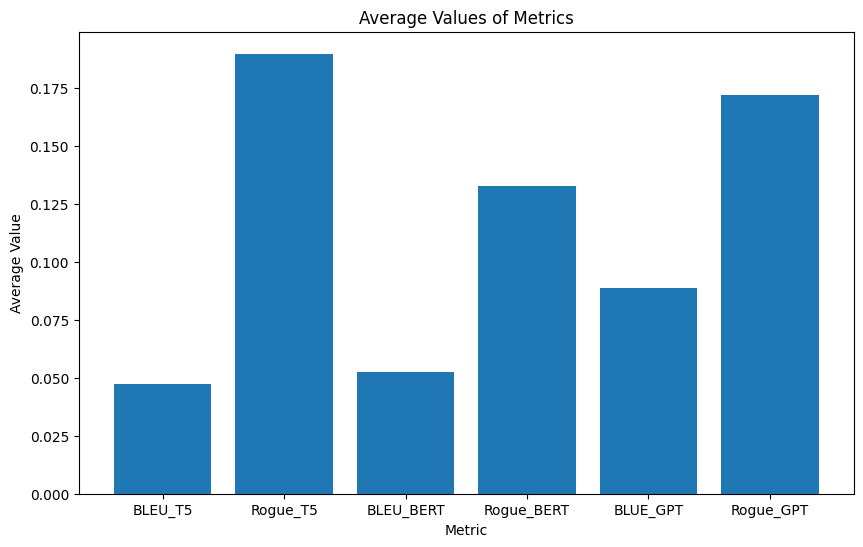

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the average of the numerical columns
averages = df[['BLEU_T5', 'Rogue_T5', 'BLEU_BERT', 'Rogue_BERT', 'BLUE_GPT', 'Rogue_GPT']].mean()

# Print the averages
print(averages)

# Plot the averages
plt.figure(figsize=(10,6))
plt.bar(averages.index, averages.values)
plt.xlabel('Metric')
plt.ylabel('Average Value')
plt.title('Average Values of Metrics')
plt.show()